In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing

In [3]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [4]:
from itertools import product

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
folder = 'D:/Fichiers_dev/titi2/'

In [7]:
df = pd.read_csv(folder+'titi.csv', sep=';', index_col='date_reference', parse_dates=True, dayfirst=True).sort_index()
df.head()

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49286 entries, 2019-01-03 to 2025-01-05
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_compte                      49286 non-null  object 
 1   campagne                       49286 non-null  object 
 2   id_ressource                   49286 non-null  object 
 3   montant                        49286 non-null  float64
 4   chiffre_affaires_prevu         49286 non-null  float64
 5   probabilite                    49286 non-null  float64
 6   techadcity                     49285 non-null  object 
 7   techadpostalcode               49286 non-null  int64  
 8   techadcountry                  49114 non-null  object 
 9   date_creation                  49286 non-null  object 
 10  etape                          49286 non-null  object 
 11  type_exercice                  49286 non-null  object 
 12  type                         

# Analyse globale

In [9]:
df.head()

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don


In [10]:
# analyse pas type_enregistrement_ressource peut etre interessant
df['type_enregistrement_ressource'].value_counts()

Don           48442
Vente           546
Adhésion        167
Abonnement      131
Name: type_enregistrement_ressource, dtype: int64

In [11]:
df['centre_responsable_collecte'].value_counts()

CCFD Terre Solidaire                                    48273
CCFD-Terre Solidaire DD 29 - Finistère                    740
CCFD-Terre Solidaire DD 28 - Eure-et-Loir                  19
CCFD-Terre Solidaire DD 56 - Morbihan                      14
CCFD-Terre Solidaire DD 22 - Côtes-d’Armor                  3
CCFD-Terre Solidaire DD 75 - Paris                          3
CCFD-Terre Solidaire DD 25 - Doubs                          2
CCFD-Terre Solidaire DD 13A - Bouches-du-Rhône (Aix)        2
CCFD-Terre Solidaire DD 38 - Isère                          2
CCFD-Terre Solidaire DD 50 - Manche                         1
CCFD-Terre Solidaire DD 67 - Bas-Rhin                       1
CCFD-Terre Solidaire DD 84 - Vaucluse                       1
CCFD-Terre Solidaire DD 24 - Dordogne                       1
07. Normandie                                               1
CCFD-Terre Solidaire DD 95 - Val-d'Oise                     1
CCFD-Terre Solidaire DD 44 - Loire-Atlantique               1
CCFD-Ter

In [12]:
df['etape'].value_counts()

Payé        39244
Promesse     6076
Annulé       3098
Rejeté        868
Name: etape, dtype: int64

In [13]:
df_paye = df[df['etape']=='Payé'][:'2023']
df_paye

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.00,30.00,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.00,12.00,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.00,5.00,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.00,7.00,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.00,10.00,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,0015I000003Ngzm,Livret Agir,006Sa000003V4qa,64.83,64.83,100.0,DOUARNENEZ,29100,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don
2023-12-31,0015I00000Nv15d,FCP Faim et Développement Compartiment Solidarité,006Sa000003hObd,476.35,476.35,100.0,PLOUNEOUR BRIGNOGAN PLAGES,29890,France,14/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,FCP Faim et Développement Compartiment Solidarité,Don
2023-12-31,0015I00000CPeoZ,Livret Agir,006Sa000003V4qe,89.38,89.38,100.0,LE FAOU,29590,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don


<Axes: >

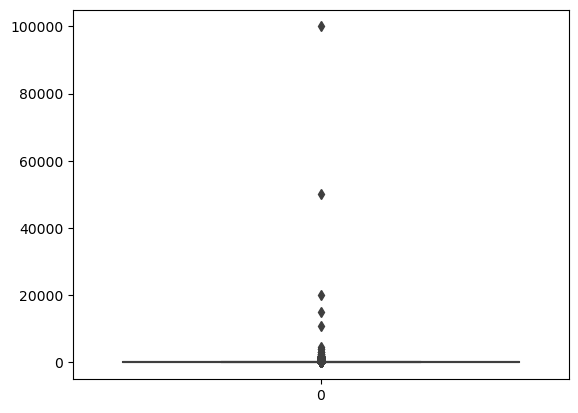

In [14]:
sns.boxplot(df_paye['montant'])

In [15]:
print(df_paye['montant'].mean())
print(df_paye['montant'].median())
print(df_paye['montant'].std())
print(df_paye['montant'].max())
print(df_paye['montant'].min())

50.10475734019644
20.0
599.312313416876
100000.0
-23.8


In [16]:
df_paye[df_paye['montant']>5000]

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-06-25,0015I00000Pku83,SPONTANE,0065I000007u0GO,15000.0,15000.0,100.0,BREST,29200,France,25/06/2019,Payé,Q2-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2020-04-23,0015I00000PnEoX,DON DIR CD:EVENEMT HEUREU/MALHEU (ne plus util...,0065I000007vPdW,100000.0,100000.0,100.0,PLOUVIEN,29860,France,19/05/2020,Payé,Q2-2020,NaN,NaN,CCFD Terre Solidaire,A00DDEF,CCFD Terre Solidaire,Don unique,DON DIR CD:EVENEMT HEUREU/MALHEU (ne plus util...,Don
2021-01-14,0015I00000PkuCq,DIVERS DONS,0065I000007vkzB,10792.0,10792.0,100.0,QUIMPERLE,29300,France,09/02/2021,Payé,Q1-2021,NaN,NaN,CCFD Terre Solidaire,DIV,CCFD Terre Solidaire,Don unique,DIVERS DONS,Don
2023-02-02,0015I00000Pm3jb,[2 à 10] [12 à 14] [18 à 26] 28 et 29 dernier ...,0065I00000D0cBm,20000.0,20000.0,100.0,QUIMPER,29000,FRA,03/02/2023,Payé,Q1-2023,NaN,NaN,CCFD Terre Solidaire,C22FMRE,CCFD Terre Solidaire,Don unique,[2 à 10] [12 à 14] [18 à 26] 28 et 29 dernier ...,Don
2023-12-20,0015I00000Plj1x,Dons spontanés 2023,006Sa000001uGsk,50000.0,50000.0,100.0,DIRINON,29460,France,21/12/2023,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,A23DUSP,CCFD Terre Solidaire,Don unique,Dons spontanés 2023,Don


# Par ville

In [17]:
df_paye.groupby('techadcity')['montant'].sum().sort_values(ascending=False)[:50]

techadcity
BREST                         311514.79
QUIMPER                       197133.28
PLOUVIEN                      101318.20
DIRINON                        54618.42
LE RELECQ KERHUON              44455.61
CONCARNEAU                     43049.33
MORLAIX                        34057.30
GUIPAVAS                       33343.60
CROZON                         28887.31
PLOUGASTEL DAOULAS             28630.70
PLOUNEOUR BRIGNOGAN PLAGES     26797.71
PONT L ABBE                    26728.40
LANDERNEAU                     26659.45
DOUARNENEZ                     25295.10
QUIMPERLE                      23962.14
PLOUZANE                       23035.07
LOCRONAN                       19345.00
ROSPORDEN                      18025.66
LESNEVEN                       17701.26
PLONEOUR LANVERN               16436.22
ST POL DE LEON                 16112.78
PLOUGASNOU                     16055.35
FOUESNANT                      16039.63
CLOHARS CARNOET                15800.85
CLOHARS FOUESNANT            

# Création de tranche de don

In [18]:
def tranche_don(valeur):
    if valeur < 20 : return 'Don < 20€'
    if 20 <= valeur < 50 : return '20€ <= Don < 50€'  
    if 50 <= valeur < 500 : return '50€ <= Don < 500€'  
    if 500 <= valeur < 1000 : return '500€ <= Don < 1000€'  
    if 1000 <= valeur < 5000 : return '1000€ <= Don < 5000€'  
    if valeur >= 5000 : return 'Don >= 5000€'  

In [19]:
df_paye['tranche_don'] = df_paye['montant'].apply(tranche_don)

In [20]:
df_paye['tranche_don'].value_counts()

Don < 20€               17905
20€ <= Don < 50€        11542
50€ <= Don < 500€        8308
500€ <= Don < 1000€       190
1000€ <= Don < 5000€      128
Don >= 5000€                5
Name: tranche_don, dtype: int64

In [21]:
df_paye['tranche_don'].unique()

array(['20€ <= Don < 50€', 'Don < 20€', '50€ <= Don < 500€',
       '1000€ <= Don < 5000€', '500€ <= Don < 1000€', 'Don >= 5000€'],
      dtype=object)

In [22]:
df_paye_sans_outliers = df_paye[df_paye['tranche_don'].isin(['20€ <= Don < 50€', 'Don < 20€', '50€ <= Don < 500€',
       '1000€ <= Don < 5000€', '500€ <= Don < 1000€'])]

In [23]:
df['sous_type']=='Don unique'

date_reference
2019-01-03     True
2019-01-05    False
2019-01-05    False
2019-01-05    False
2019-01-05    False
              ...  
2025-01-05    False
2025-01-05    False
2025-01-05    False
2025-01-05    False
2025-01-05    False
Name: sous_type, Length: 49286, dtype: bool

In [24]:
df_paye_sans_outliers['sous_type'].value_counts()

PA SEPA              27113
Don unique            9184
Epargne solidaire      434
PA CB                  260
Don boutique           225
Abandon de frais        15
Name: sous_type, dtype: int64

# Analyse par mois dons uniques

In [25]:
df_mois = df_paye_sans_outliers[df_paye_sans_outliers['sous_type']=='Don unique'][['montant']].resample('M').sum().reset_index()
df_mois['annee'] = df_mois['date_reference'].dt.year
df_mois['mois'] = df_mois['date_reference'].dt.month
df_mois['mois'] = df_mois['mois'].replace([x+1 for x in range(12)],
                                         ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])
df_mois.head()

,date_reference,montant,annee,mois
0,2019-01-31,5060.30,2019,janvier
1,2019-02-28,3760.00,2019,février
2,2019-03-31,16910.00,2019,mars
3,2019-04-30,43909.00,2019,avril
4,2019-05-31,28988.06,2019,mai


In [26]:
mois = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
mois_pivot = pd.pivot_table(df_mois, values='montant', index='annee', columns='mois', aggfunc='sum')
mois_pivot = mois_pivot[mois]
mois_pivot

mois,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
annee,,,,,,,,,,,,
2019,5060.3,3760.00,16910.00,43909.00,28988.06,22622.81,6890.00,7476.10,9956.92,11553.00,15749.08,51377.92
2020,1425.0,6705.00,8948.22,5587.00,35654.06,33022.60,20606.40,8640.00,9002.35,13358.79,12532.98,53731.35
2021,2433.0,12385.00,16123.90,13252.23,34765.00,22999.31,18761.98,12758.03,11464.69,10100.00,13240.27,54352.60
2022,2930.0,7129.37,28719.30,34038.50,10000.00,15941.79,12705.40,6415.00,7594.58,5853.00,13214.00,50303.86
2023,3295.0,15061.44,39752.38,28991.10,11175.68,4325.00,5300.00,6782.00,11242.95,11321.00,11204.00,42186.88


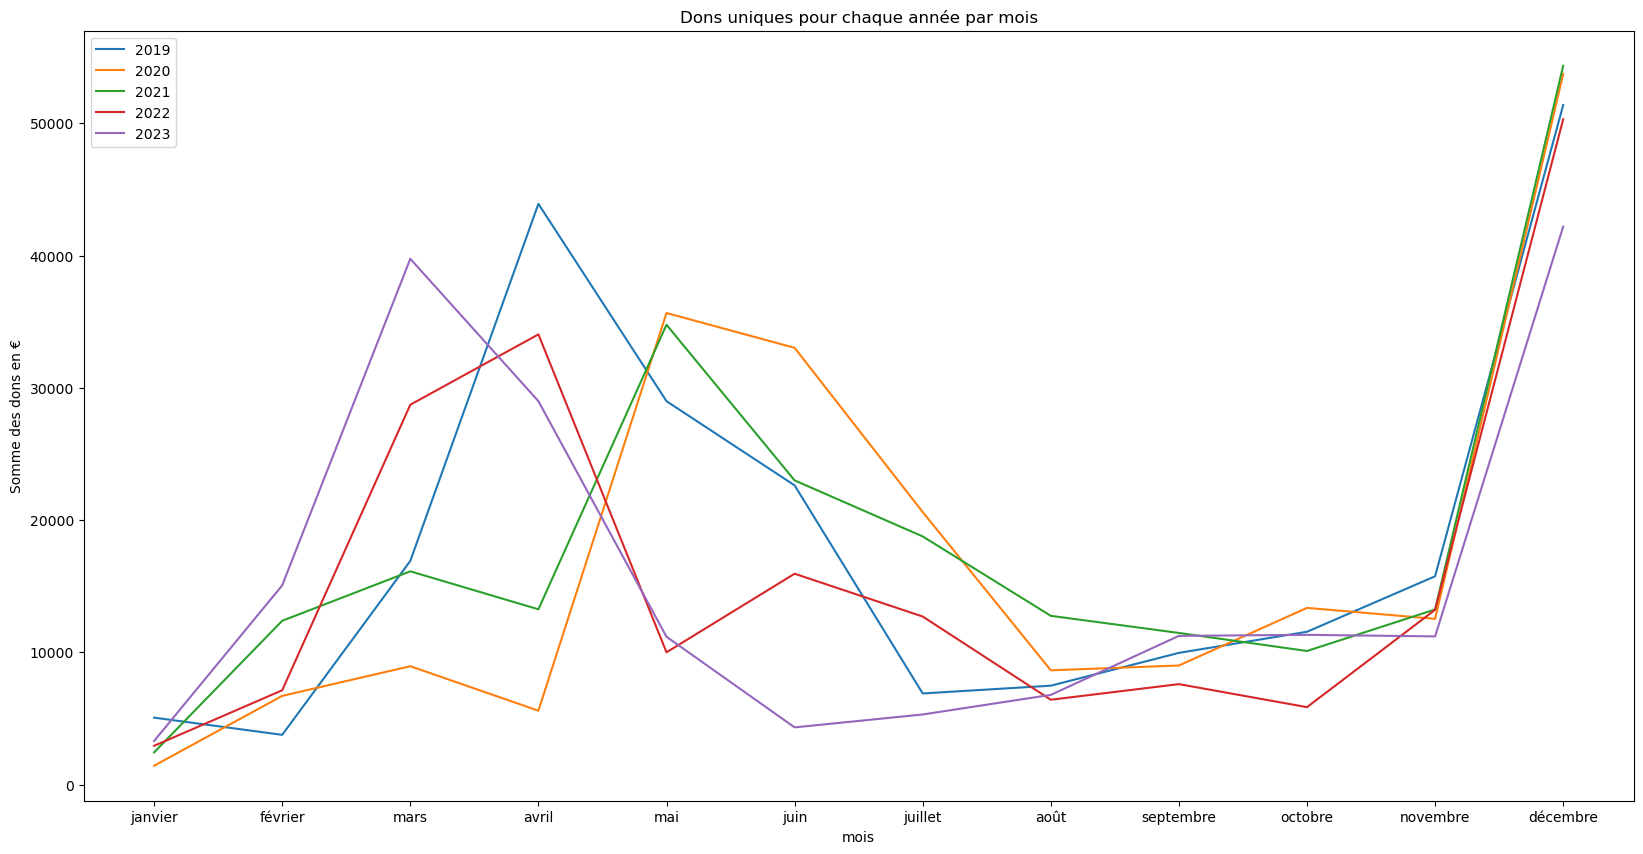

In [27]:
plt.figure(figsize=(20,10))
plt.title("Dons uniques pour chaque année par mois")
plt.ylabel("Somme des dons en €")
for ligne in mois_pivot.iterrows():
    ligne[1].plot(label=f'{ligne[0]}')
    plt.xticks([x for x in range(12)], mois)
    plt.legend()

On voit que le pic de dons de Noël est constant suivant les années.

Mais le pic du printemps varient entre mars, avril et mai suivant les années.

# Analyse par mois prélèvement

In [28]:
df_mois_prel = df_paye_sans_outliers[df_paye_sans_outliers['sous_type']=='PA SEPA'][['montant']].resample('M').sum().reset_index()
df_mois_prel['annee'] = df_mois_prel['date_reference'].dt.year
df_mois_prel['mois'] = df_mois_prel['date_reference'].dt.month
df_mois_prel['mois'] = df_mois_prel['mois'].replace([x+1 for x in range(12)],
                                         ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])

df_mois_prel.head()

,date_reference,montant,annee,mois
0,2019-01-31,7754.59,2019,janvier
1,2019-02-28,8837.45,2019,février
2,2019-03-31,7072.72,2019,mars
3,2019-04-30,7862.59,2019,avril
4,2019-05-31,9141.45,2019,mai


In [29]:
mois_pivot_prel = pd.pivot_table(df_mois_prel, values='montant', index='annee', columns='mois', aggfunc='sum')
mois_pivot_prel = mois_pivot_prel[mois]
mois_pivot_prel

mois,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
annee,,,,,,,,,,,,
2019,7754.59,8837.45,7072.72,7862.59,9141.45,7361.72,8106.59,9342.16,7569.43,8299.30,9371.16,7590.43
2020,8357.30,9301.16,7554.81,8528.68,9585.54,7887.81,9008.68,9931.54,8211.81,9102.68,10073.54,8246.81
2021,9151.68,10146.54,8259.81,10670.68,11638.54,9562.81,10433.68,11225.54,9311.57,10197.44,11132.30,9311.57
2022,10097.44,11220.30,9303.57,10191.44,11105.30,9346.57,10220.44,12237.30,10928.57,11563.44,11222.80,10692.07
2023,11452.94,11142.80,10447.07,11146.94,10798.80,10366.07,11229.94,10860.80,10175.07,11066.94,10711.80,10061.07


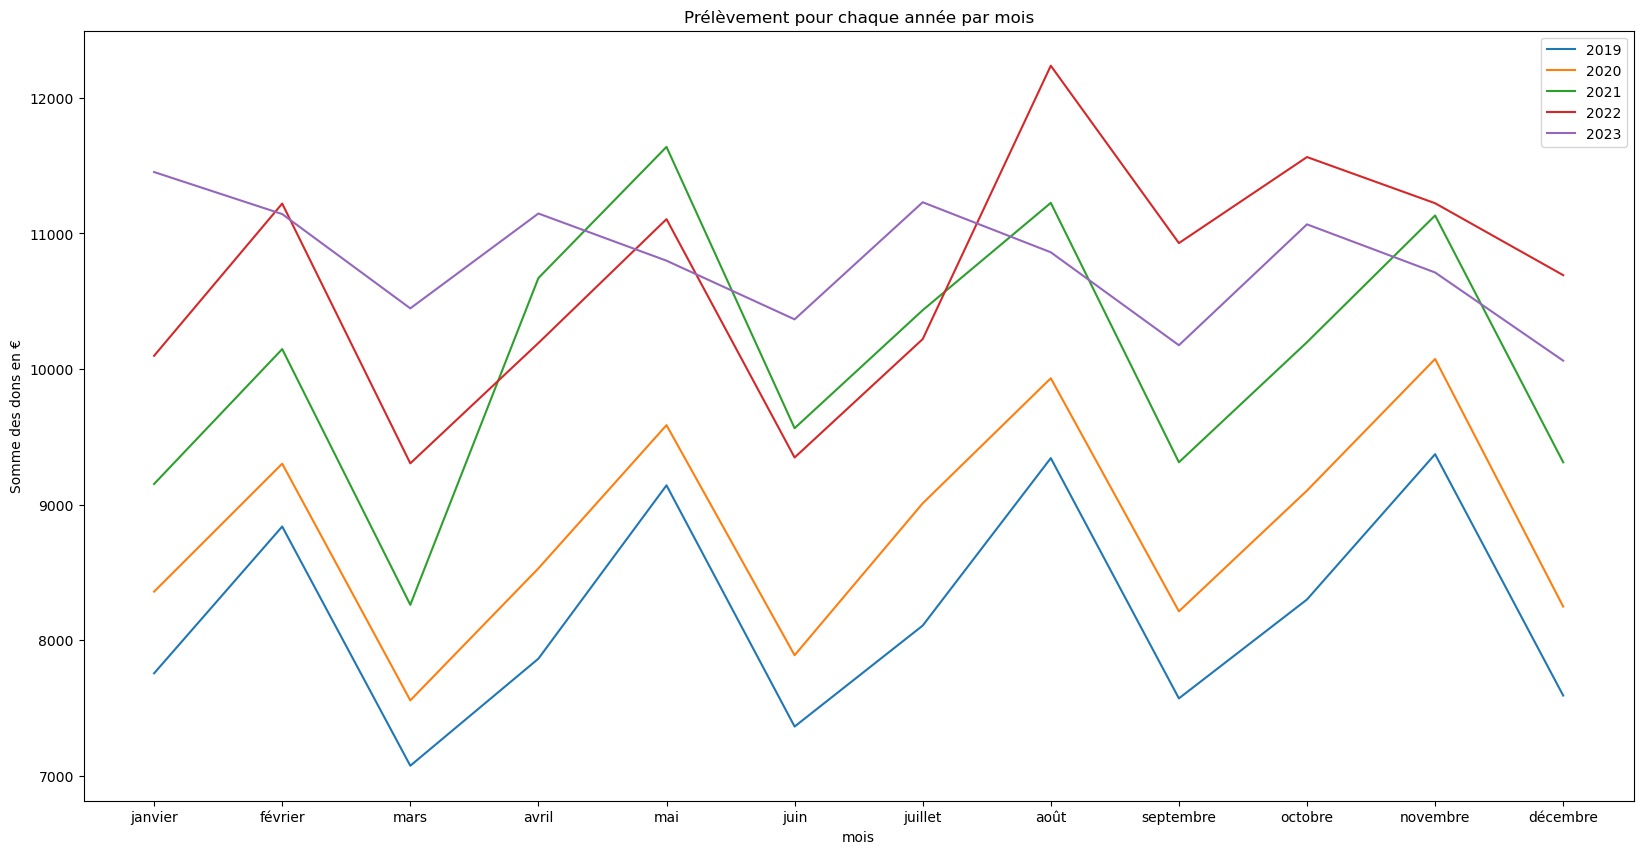

In [30]:
plt.figure(figsize=(20,10))
plt.title("Prélèvement pour chaque année par mois")
plt.ylabel("Somme des dons en €")
for ligne in mois_pivot_prel.iterrows():
    ligne[1].plot(label=f'{ligne[0]}')
    plt.xticks([x for x in range(12)], mois)
    plt.legend()

# Evolution des dons

In [31]:
for sous_type in df_paye_sans_outliers['sous_type'].unique()[~pd.isnull(df_paye_sans_outliers['sous_type'].unique())]:
    data = df_paye_sans_outliers.loc[df_paye_sans_outliers['sous_type']==sous_type, 'montant'].sum()
    print(f"{sous_type} : {data} : {data/df_paye_sans_outliers['montant'].sum()}")

Don unique : 1041585.1799999999 : 0.60836810672433
PA SEPA : 582731.5899999999 : 0.3403613270848942
PA CB : 4659.0 : 0.0027212244026250964
Epargne solidaire : 21975.3 : 0.012835312860057369
Abandon de frais : 7094.59 : 0.004143801552826783
Don boutique : 10340.509999999998 : 0.006039675498516598


<Axes: xlabel='date_reference'>

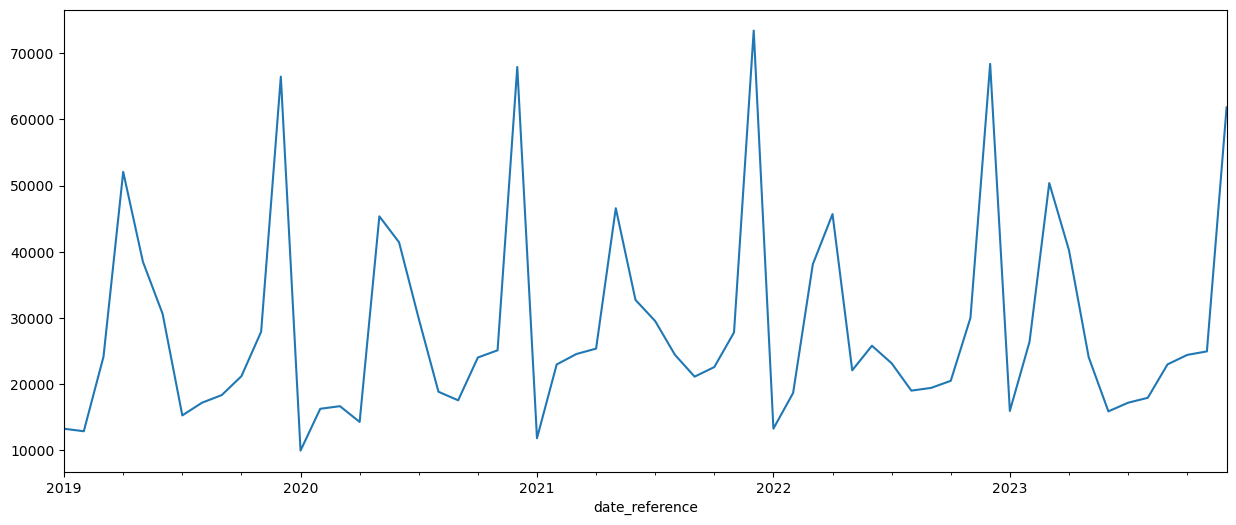

In [32]:
plt.figure(figsize=(15,6))
df_paye_sans_outliers['montant'].resample('M').sum().plot()

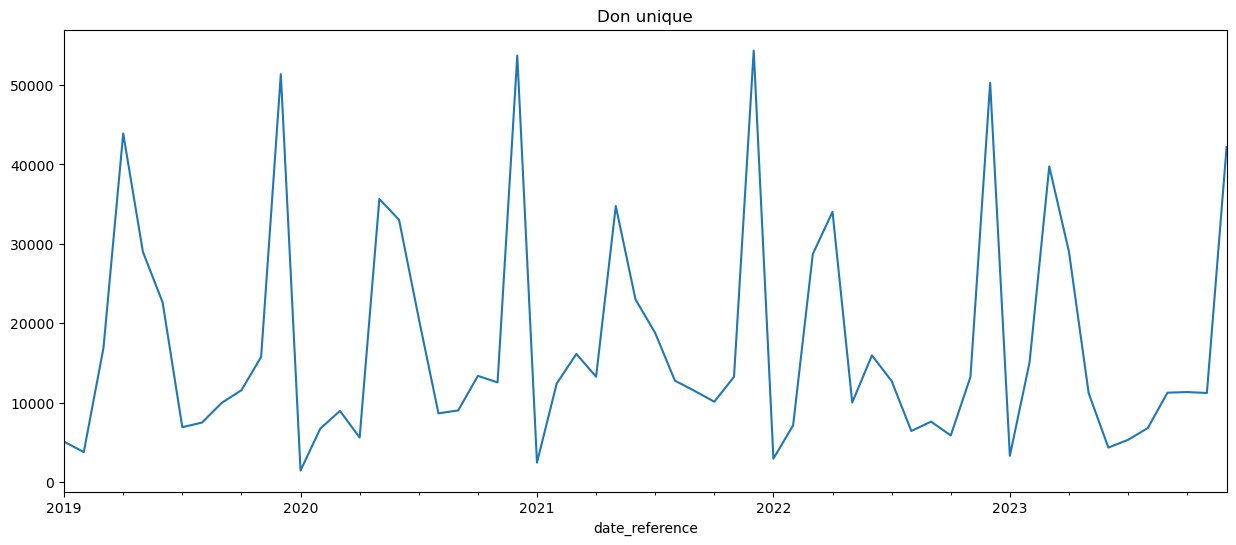

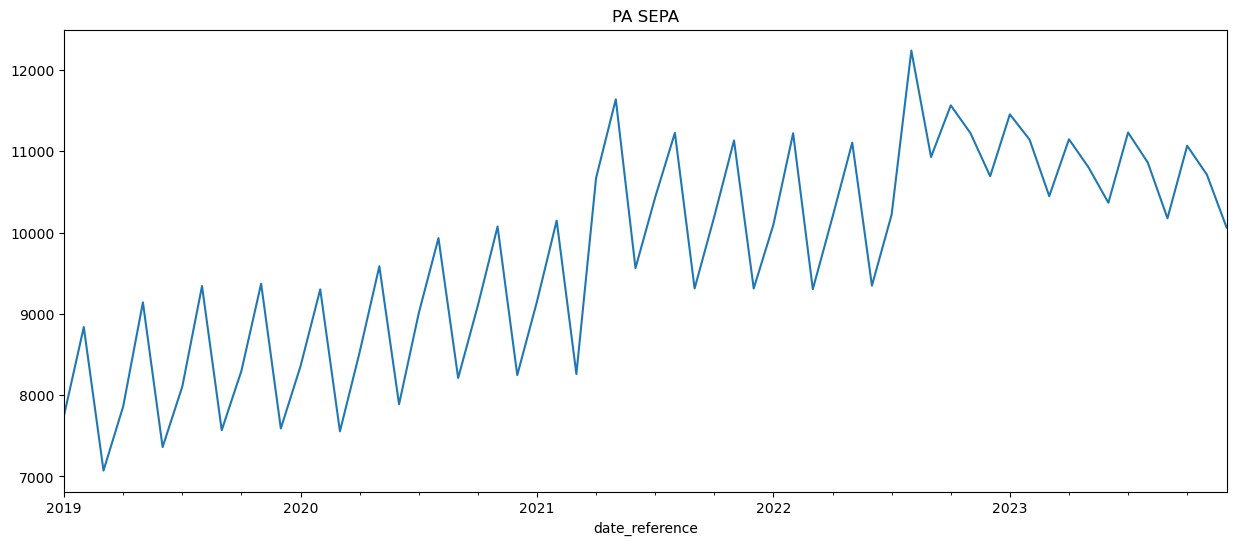

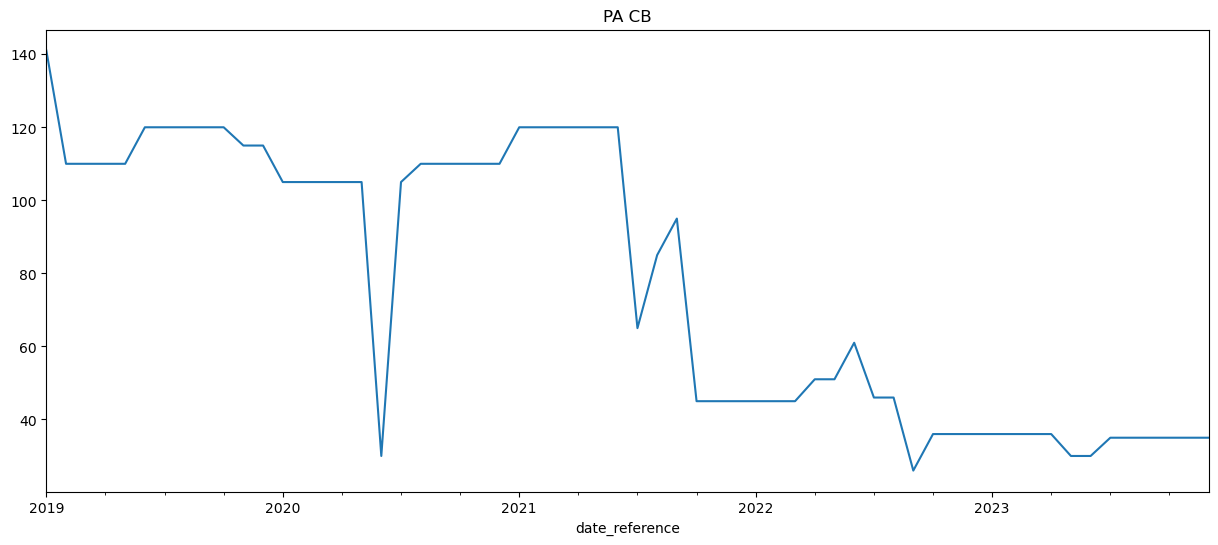

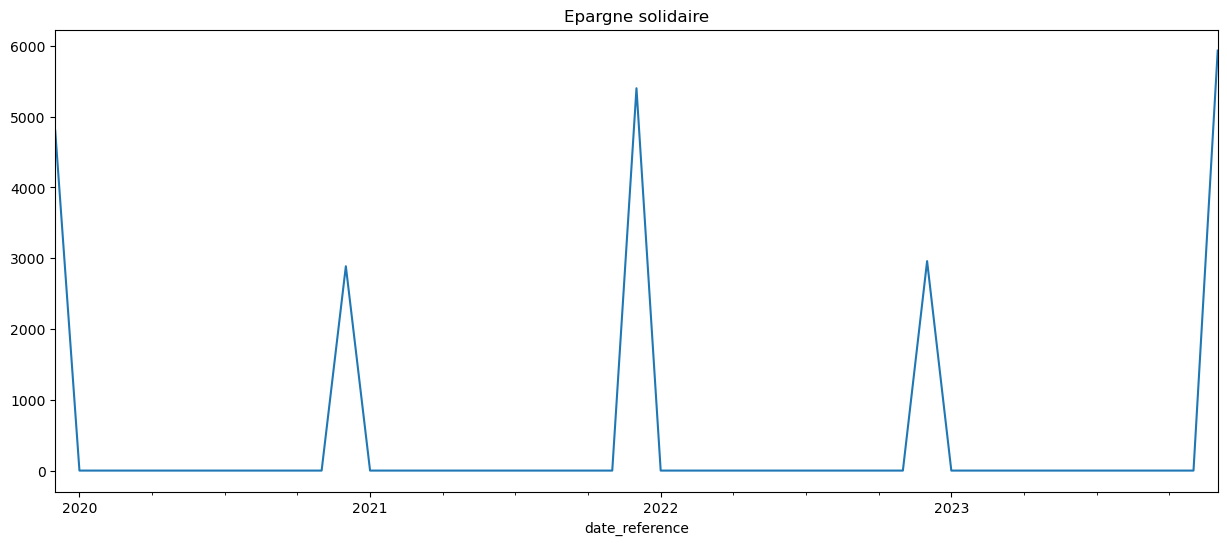

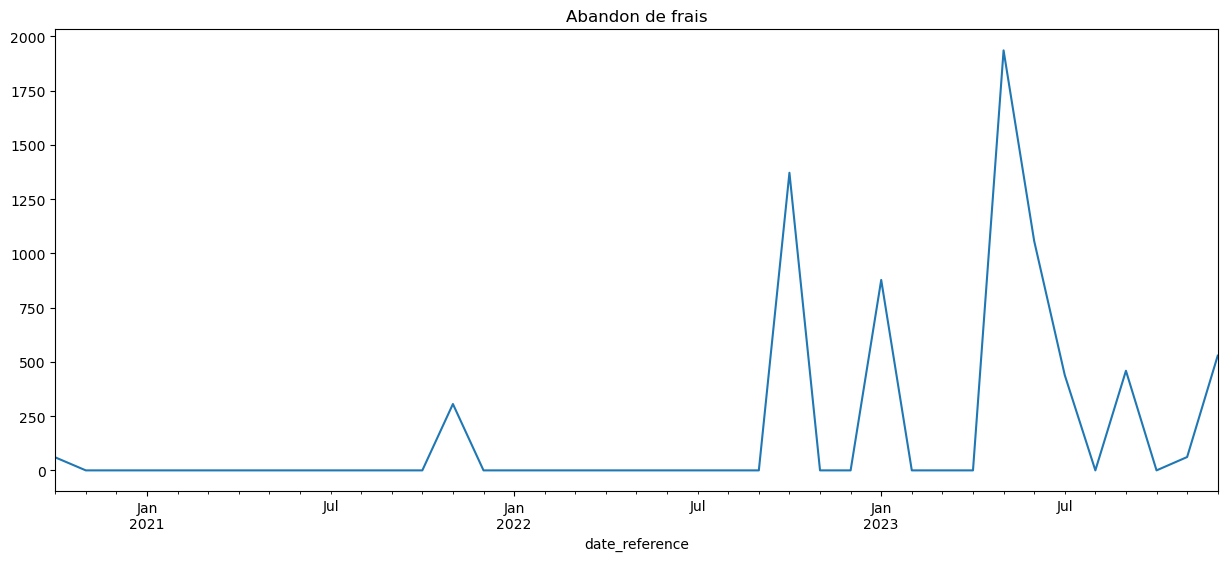

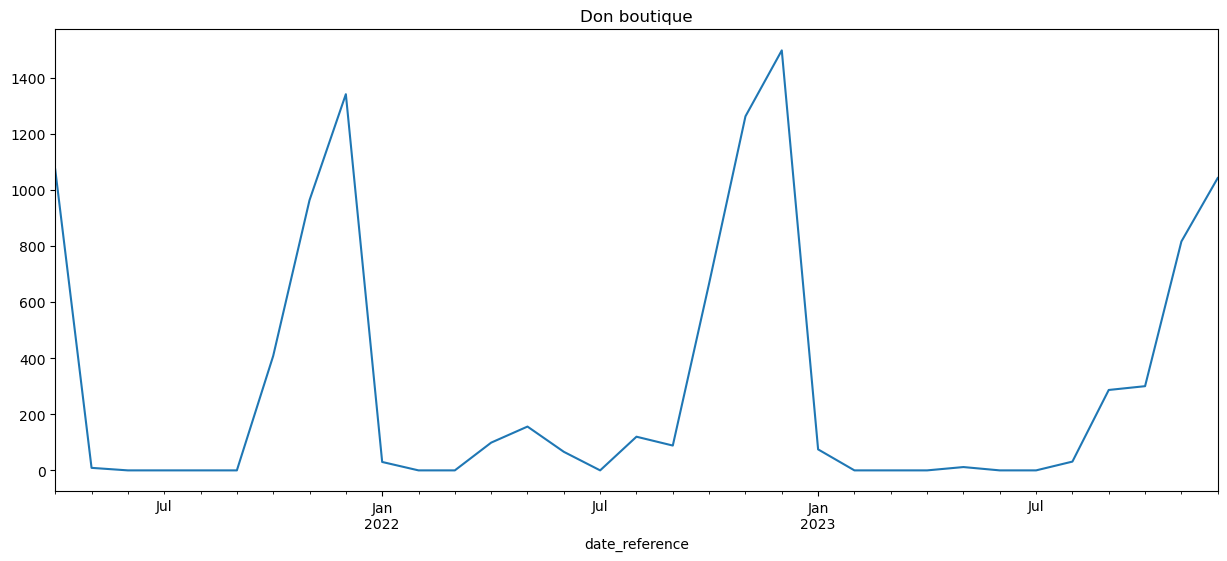

In [33]:
for sous_type in df_paye_sans_outliers['sous_type'].unique()[~pd.isnull(df_paye_sans_outliers['sous_type'].unique())]:
    plt.figure(figsize=(15,6))
    plt.title(f'{sous_type}')
    data = df_paye_sans_outliers.loc[df_paye_sans_outliers['sous_type']==sous_type, 'montant'].resample('M').sum()
    data.plot()
    plt.show()

# Evolution des dons uniques

In [34]:
dons_uniques = df_paye_sans_outliers.loc[df_paye_sans_outliers['sous_type']=='Don unique', 'montant'].resample('M').sum()
dons_uniques.head()

date_reference
2019-01-31     5060.30
2019-02-28     3760.00
2019-03-31    16910.00
2019-04-30    43909.00
2019-05-31    28988.06
Freq: M, Name: montant, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


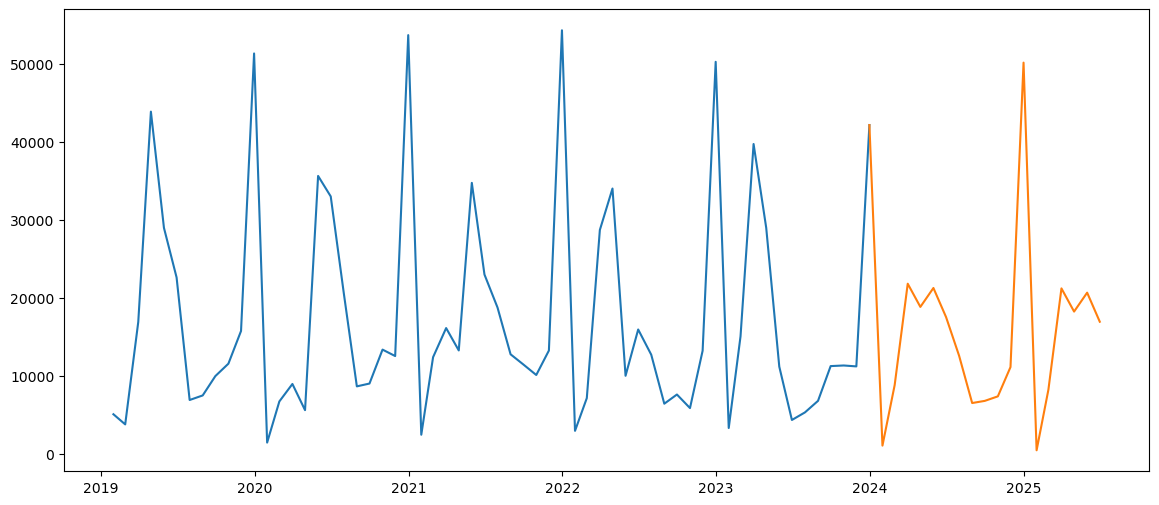

In [35]:
les = ExponentialSmoothing(dons_uniques, trend='additive', seasonal='additive', seasonal_periods=12, freq='M').fit()

les_pred = les.forecast(18)
les_pred = pd.concat((dons_uniques[-1:], les_pred), axis=0)

plt.figure(figsize=(14,6))

plt.plot(dons_uniques, label='dons uniques')

plt.plot(les_pred, label='prédictions')

plt.show()

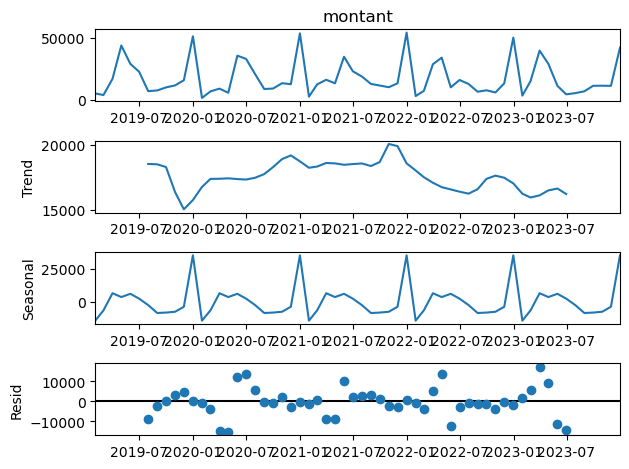

In [36]:
result = seasonal_decompose(dons_uniques, model='additive')
result.plot()
plt.show()

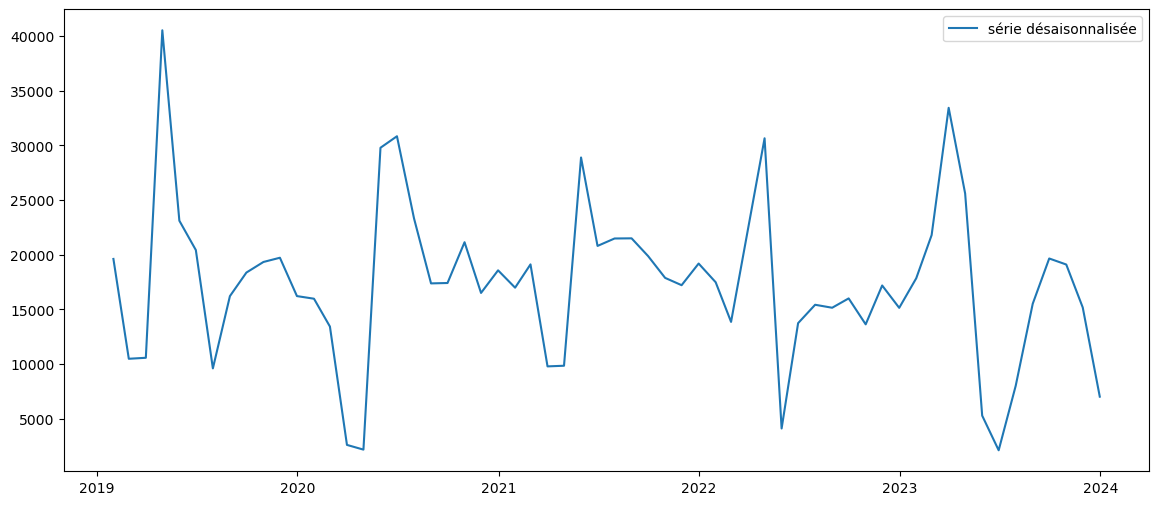

In [37]:
plt.figure(figsize=(14,6))
plt.plot(dons_uniques - result.seasonal, label='série désaisonnalisée')
#plt.plot(result.seasonal, label='saisonnalité')
#plt.plot(dons_uniques, label='dons uniques')
plt.legend()
plt.show()

# SARIMA

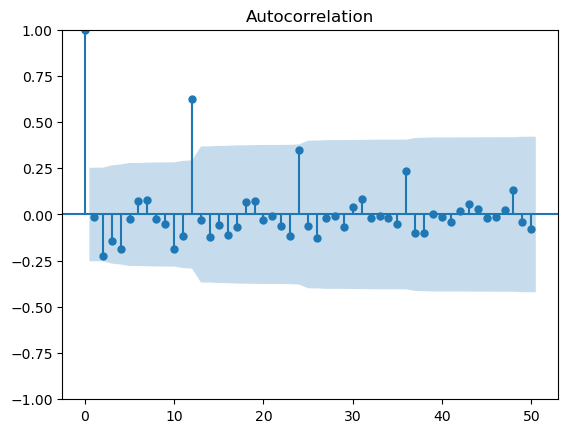

In [38]:
y = dons_uniques

plot_acf(y, lags=50)

plt.show()

In [39]:
def test_stationnaire(series):
    result = adfuller(series)
    print("H0 : La série n'est pas stationnaire",'\n', "H1 : La série est stationnaire")
    print('Statistique du test ADF :', result[0])
    print('Valeur p :', result[1])
    print('Valeurs critiques :', result[4])
    if result[1] < 0.05:
        print('p-value < 0.05, on rejette H0 --> La série temporelle est stationnaire.')
    else:
        print('p-value > 0.05, on ne peut pas rejeter H0 --> La série temporelle n\'est pas stationnaire.')

In [40]:
test_stationnaire(y)

H0 : La série n'est pas stationnaire 
 H1 : La série est stationnaire
Statistique du test ADF : -2.007236354668734
Valeur p : 0.2834092513132912
Valeurs critiques : {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
p-value > 0.05, on ne peut pas rejeter H0 --> La série temporelle n'est pas stationnaire.


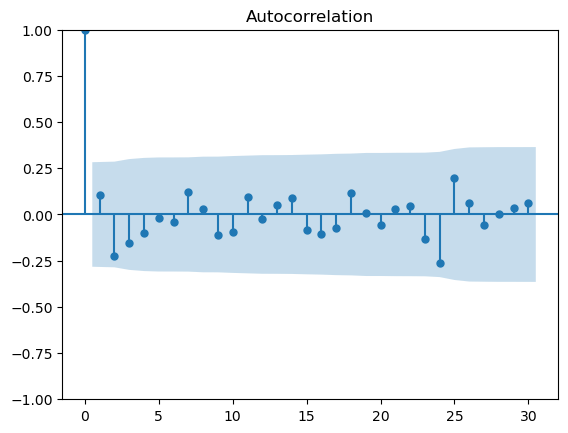

In [41]:
y_dif_12 = (y - y.shift(12)).dropna()

plot_acf(y_dif_12, lags=30)

plt.show()

In [42]:
test_stationnaire(y_dif_12)

H0 : La série n'est pas stationnaire 
 H1 : La série est stationnaire
Statistique du test ADF : -5.9973305902364435
Valeur p : 1.6893674331600493e-07
Valeurs critiques : {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
p-value < 0.05, on rejette H0 --> La série temporelle est stationnaire.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


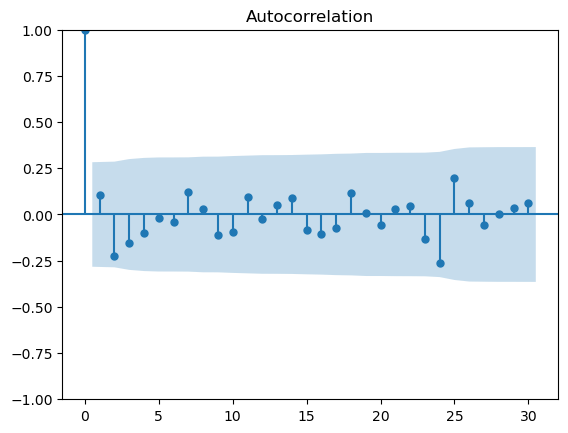

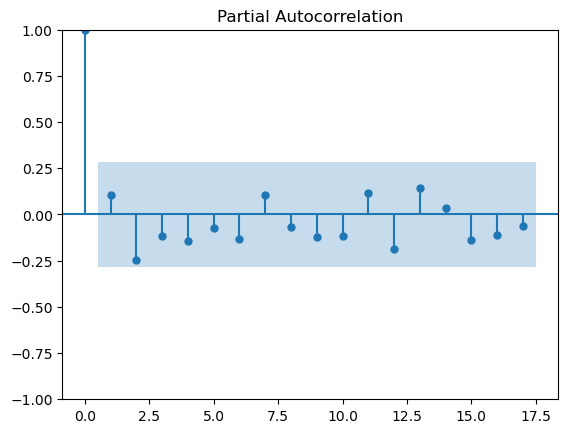

In [43]:
plot_acf(y_dif_12, lags=30)
plot_pacf(y_dif_12)

plt.show()

# Analyse à posteriori

In [44]:
def modele_serie_temporelle(train, test, differenciation, S, matrice_params):
    
    scores = {'params' : [],
         'rmse' : [],
         'mape' : [],
         'mae' : [],
         'aic' : [],
         'bic' : []}
    
    modeles_valides = []

    # définition des différenciation (tendance et saisonnalité)
    d,D = differenciation


    for i, (p,q,P,Q) in enumerate(matrice_params):

        try :

            print(f"Itération {i+1}")
            model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,S))
            result = model.fit()
            print(f"Modèle : order=({p},{d},{q}), seasonal_order=({P},{D},{Q},{S})")

            # test de blancheur
            tests_blancheur = []
            for elt in [6, 12, 18, 24, 30]:
                test_blancheur = acorr_ljungbox(result.resid, lags=elt, return_df=False)[1].mean()
                if test_blancheur < 0.05 : tests_blancheur.append(test_blancheur) 
            if len(tests_blancheur) > 0 : 
                print("Le test de blancheur n'est pas passé")    

            # Significativité des paramètres
            params_non_significatif = len(result.pvalues[result.pvalues>0.05].values)
            if params_non_significatif > 0:
                print("Certains des paramètres ne sont pas significatifs")

            # si au moins une des conditions est rempli, on passe à l'itération suivante
            if (len(tests_blancheur) > 0) or (params_non_significatif > 0) :
                continue

            # on affiche les résultats si le modèle valide les conditions
            print(result.summary())

            # prédiction
            pred_model = result.get_forecast(12)

            pred = pred_model.predicted_mean
            pred = pd.concat((train[-1:], pred), axis=0)
            

            pred_lower = pred_model.conf_int()['lower montant']

            pred_upper = pred_model.conf_int()['upper montant']

            # affichage des courbes
            plt.figure(figsize=(15,6))
            plt.title("Evolution ventes")
            plt.plot(train, label='train')
            plt.plot(test, label='test')
            plt.plot(pred, label='Prédiction')
            plt.legend()
            plt.show()
            
            # enregistrement parametres modele
            modeles_valides.append((p,q,P,Q))
            
            
            params = (p,d,q,P,D,Q,S)
            rmse = np.sqrt(mean_squared_error(test.values, pred.values))
            mape = mean_absolute_percentage_error(test.values, pred.values)
            mae = mean_absolute_error(test.values, pred.values)

            # creation d'un tableau de métriques
            scores['params'].append(params)
            scores['rmse'].append(rmse)
            scores['mape'].append(mape)
            scores['mae'].append(mae)
            scores['aic'].append(result.aic)
            scores['bic'].append(result.bic)

        # gestion des erreurs    
        except Exception as error:

            print(f"Modèle : order=({p},{d},{q}), seasonal_order=({P},{D},{Q},{S})")
            print(error)
    print(scores)
    score = pd.DataFrame(scores).sort_values('mape')
    
    return score, modeles_valides

In [45]:
y.shape

(60,)

Itération 1
Modèle : order=(0,0,0), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Itération 2
Modèle : order=(0,0,0), seasonal_order=(0,1,1,12)
                                 SARIMAX Results                                  
Dep. Variable:                    montant   No. Observations:                   48
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -381.171
Date:                    Thu, 29 Feb 2024   AIC                            766.342
Time:                            14:14:23   BIC                            769.509
Sample:                        01-31-2019   HQIC                           767.447
                             - 12-31-2022                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


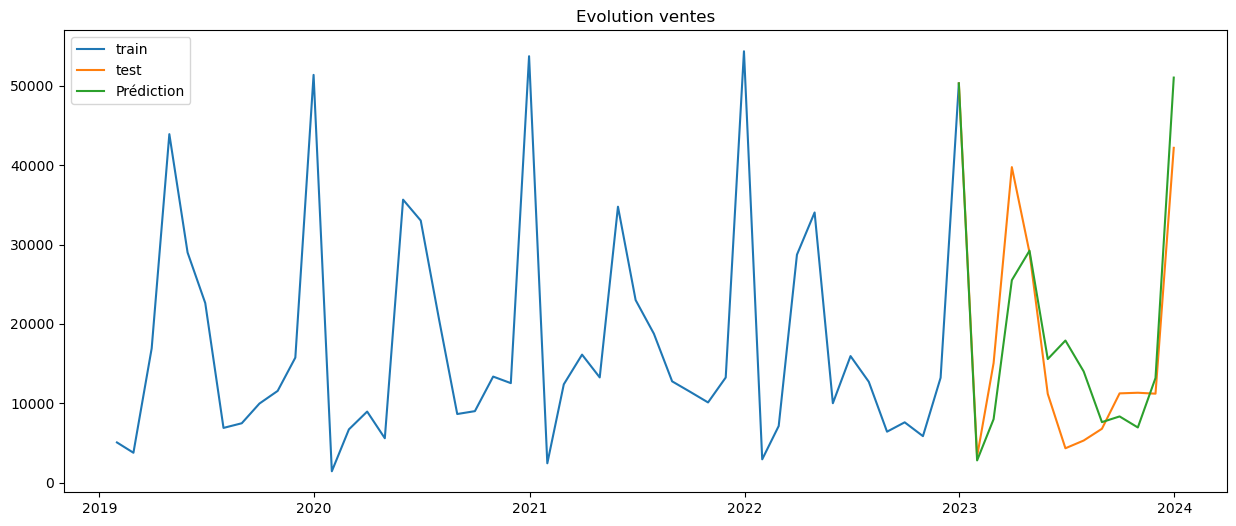

Itération 3
Modèle : order=(0,0,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 4
Modèle : order=(0,0,0), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Itération 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,0), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 7
Modèle : order=(0,0,0), seasonal_order=(2,1,0,12)
                                SARIMAX Results                                 
Dep. Variable:                  montant   No. Observations:                   48
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -384.320
Date:                  Thu, 29 Feb 2024   AIC                            774.641
Time:                          14:14:25   BIC                            779.391
Sample:                      01-31-2019   HQIC                           776.299
                           - 12-31-2022                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2155      0.039

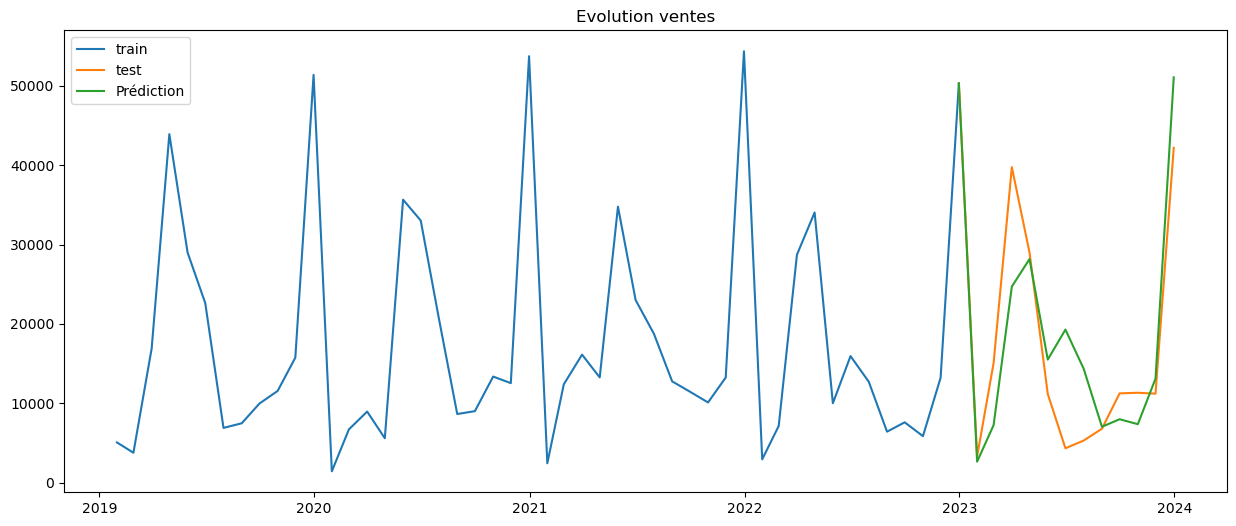

Itération 8
Modèle : order=(0,0,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 9


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 10
Modèle : order=(0,0,1), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 11
Modèle : order=(0,0,1), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,1), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 13
Modèle : order=(0,0,1), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 14


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,1), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 15


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,1), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 16
Modèle : order=(0,0,1), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 17


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,1), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 18


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 19
Modèle : order=(0,0,2), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 20
Modèle : order=(0,0,2), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,2), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 22
Modèle : order=(0,0,2), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,2), seasonal_order=(1,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(0,0,2), seasonal_order=(1,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 25
Modèle : order=(0,0,2), seasonal_order=(2,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,2), seasonal_order=(2,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 27


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,0,2), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 28
Modèle : order=(1,0,0), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 29
Modèle : order=(1,0,0), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 30
Modèle : order=(1,0,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 31
Modèle : order=(1,0,0), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 32


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,0), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 33
Modèle : order=(1,0,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 34
Modèle : order=(1,0,0), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 36


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 37
Modèle : order=(1,0,1), seasonal_order=(0,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                             montant   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                -380.863
Date:                             Thu, 29 Feb 2024   AIC                            767.727
Time:                                     14:14:35   BIC                            772.477
Sample:                                 01-31-2019   HQIC                           769.385
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

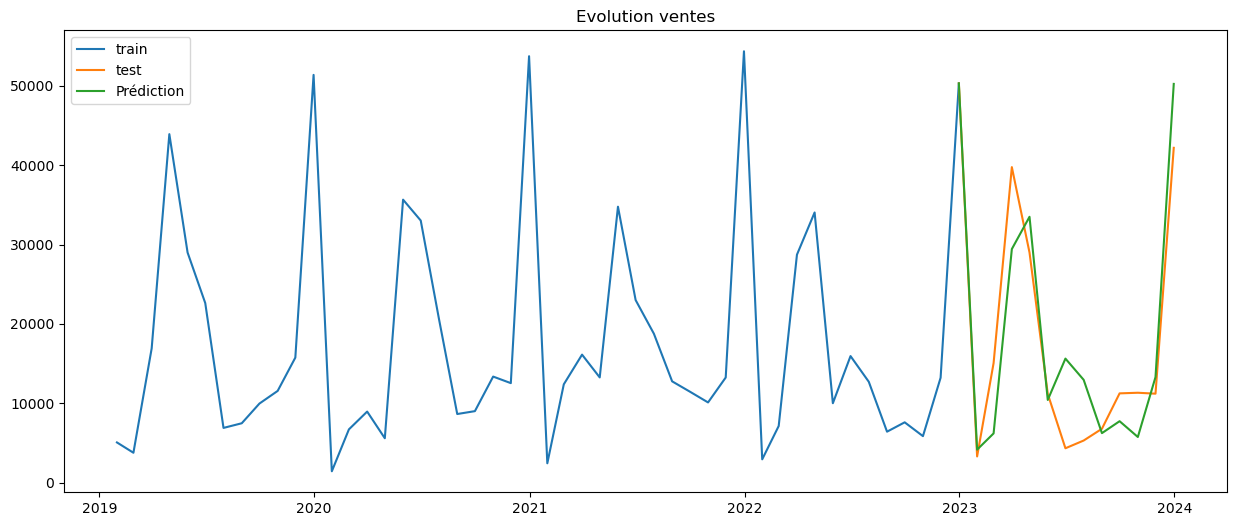

Itération 38
Modèle : order=(1,0,1), seasonal_order=(0,1,1,12)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -380.097
Date:                            Thu, 29 Feb 2024   AIC                            768.193
Time:                                    14:14:35   BIC                            774.528
Sample:                                01-31-2019   HQIC                           770.404
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.155     -4.879      0.000      -1.059      -0.452
ma.L1          0.9240      0.142   

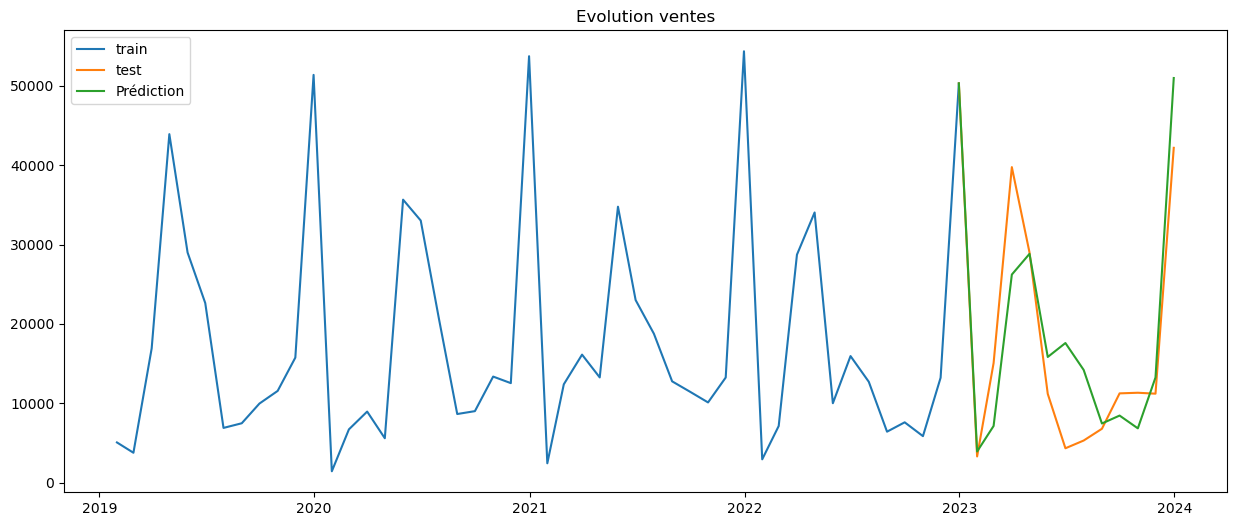

Itération 39


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,1), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 40
Modèle : order=(1,0,1), seasonal_order=(1,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                             montant   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -380.622
Date:                             Thu, 29 Feb 2024   AIC                            769.245
Time:                                     14:14:36   BIC                            775.579
Sample:                                 01-31-2019   HQIC                           771.455
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

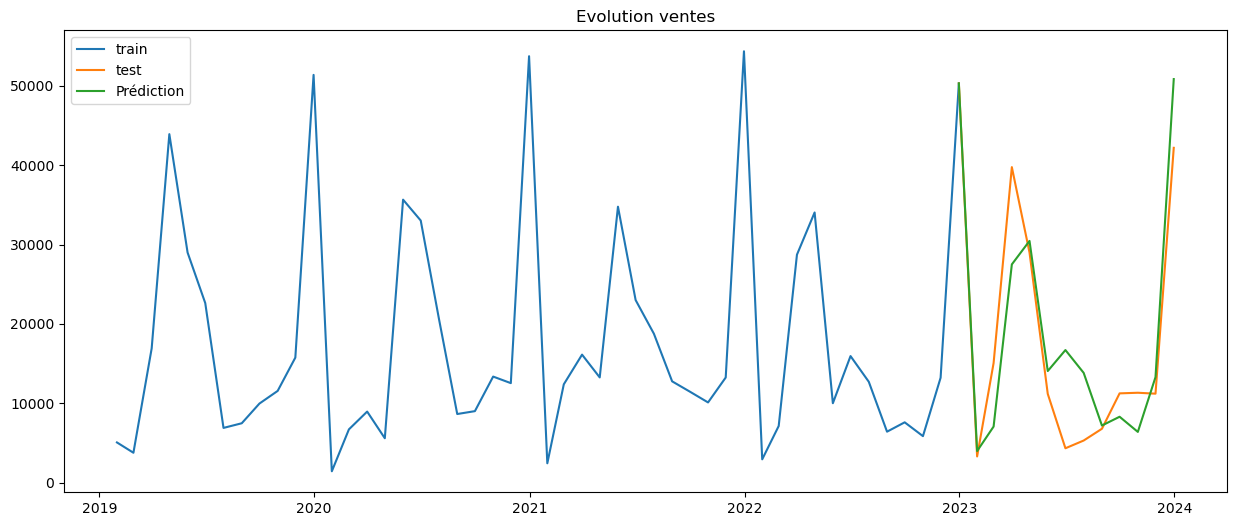

Itération 41


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,1), seasonal_order=(1,1,1,12)
                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -378.900
Date:                            Thu, 29 Feb 2024   AIC                            767.800
Time:                                    14:14:37   BIC                            775.718
Sample:                                01-31-2019   HQIC                           770.564
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7552      0.207     -3.655      0.000      -1.1

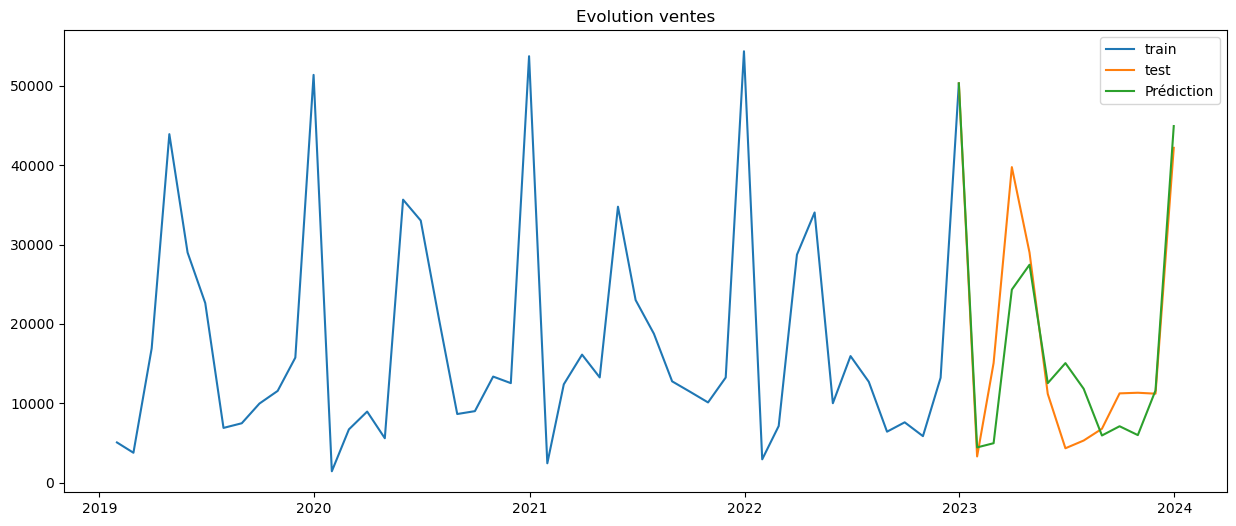

Itération 42


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(1,0,1), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 43
Modèle : order=(1,0,1), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 44


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,1), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 45


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 46
Modèle : order=(1,0,2), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 47
Modèle : order=(1,0,2), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 48


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,2), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 49
Modèle : order=(1,0,2), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 50


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,2), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 51


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(1,0,2), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 52
Modèle : order=(1,0,2), seasonal_order=(2,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 53


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,2), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 54


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,0,2), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 55
Modèle : order=(2,0,0), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 56
Modèle : order=(2,0,0), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 57
Modèle : order=(2,0,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 58
Modèle : order=(2,0,0), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 59


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,0), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 60


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 61
Modèle : order=(2,0,0), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 62


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 63


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 64
Modèle : order=(2,0,1), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 65


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,1), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 66
Modèle : order=(2,0,1), seasonal_order=(0,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 67
Modèle : order=(2,0,1), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 68


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,1), seasonal_order=(1,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 69


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(2,0,1), seasonal_order=(1,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 70
Modèle : order=(2,0,1), seasonal_order=(2,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 71


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,1), seasonal_order=(2,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 72


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(2,0,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 73


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,2), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Itération 74


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,2), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 75


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(2,0,2), seasonal_order=(0,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 76
Modèle : order=(2,0,2), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 77


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,2), seasonal_order=(1,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 78


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(2,0,2), seasonal_order=(1,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 79
Modèle : order=(2,0,2), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 80


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,0,2), seasonal_order=(2,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 81
Modèle : order=(2,0,2), seasonal_order=(2,1,2,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
{'params': [(0, 0, 0, 0, 1, 1, 12), (0, 0, 0, 2, 1, 0, 12), (1, 0, 1, 0, 1, 0, 12), (1, 0, 1, 0, 1, 1, 12), (1, 0, 1, 1, 1, 0, 12), (1, 0, 1, 1, 1, 1, 12)], 'rmse': [7033.780626330128, 7451.308523448942, 6237.698531695869, 6978.417814645133, 6584.273063860438, 6548.123527481735], 'mape': [0.5628718036758225, 0.5948497934026213, 0.5115732606947689, 0.5658871763016079, 0.5364431855326791, 0.488960440440413], 'mae': [5204.999965007192, 5455.316559472867, 4925.748080157408, 5219.261694830453, 5017.045584539593, 4637.908061404211], 'aic': [766.3420746560279, 774.6408766730866, 767.7268438449124, 768.1934993057201, 769.2446210153103, 767.8004124703384], 'bic': [769.5091125329401, 779.3914334884549, 772.4774006

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
train = y[:-12]
test = y[-13:]

# période saisonnalité
S = 12
# degré de différenciation tendance, saisonnalité
differenciation = (0,1)

# matrice des paramètres à tester
matrice_params = product([0,1,2], repeat=4)

# execution fonction
score, modeles_valides = modele_serie_temporelle(train, test, differenciation, S, matrice_params)

In [47]:
score

,params,rmse,mape,mae,aic,bic
5,"(1, 0, 1, 1, 1, 1, 12)",6548.123527,0.488960,4637.908061,767.800412,775.718007
2,"(1, 0, 1, 0, 1, 0, 12)",6237.698532,0.511573,4925.748080,767.726844,772.477401
4,"(1, 0, 1, 1, 1, 0, 12)",6584.273064,0.536443,5017.045585,769.244621,775.578697
0,"(0, 0, 0, 0, 1, 1, 12)",7033.780626,0.562872,5204.999965,766.342075,769.509113
3,"(1, 0, 1, 0, 1, 1, 12)",6978.417815,0.565887,5219.261695,768.193499,774.527575
1,"(0, 0, 0, 2, 1, 0, 12)",7451.308523,0.594850,5455.316559,774.640877,779.391433


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Itération 1
Modèle : order=(0,1,0), seasonal_order=(0,1,0,12)
Le test de blancheur n'est pas passé
Itération 2
Modèle : order=(0,1,0), seasonal_order=(0,1,1,12)
Le test de blancheur n'est pas passé
Itération 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 4
Modèle : order=(0,1,0), seasonal_order=(1,1,0,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,0), seasonal_order=(1,1,1,12)
Le test de blancheur n'est pas passé
Certains des paramètres ne sont pas significatifs
Itération 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 7
Modèle : order=(0,1,0), seasonal_order=(2,1,0,12)
                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -382.286
Date:                            Thu, 29 Feb 2024   AIC                            770.572
Time:                                    14:15:05   BIC                            775.238
Sample:                                01-31-2019   HQIC                           772.183
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

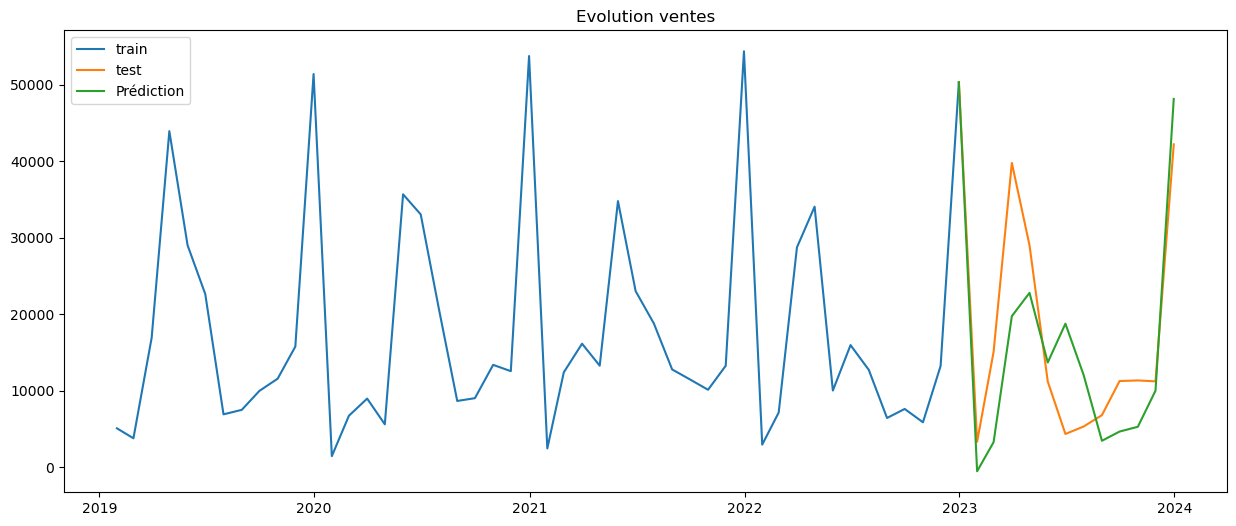

Itération 8


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 9


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 10
Modèle : order=(0,1,1), seasonal_order=(0,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                             montant   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -378.691
Date:                             Thu, 29 Feb 2024   AIC                            761.382
Time:                                     14:15:06   BIC                            764.493
Sample:                                 01-31-2019   HQIC                           762.456
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

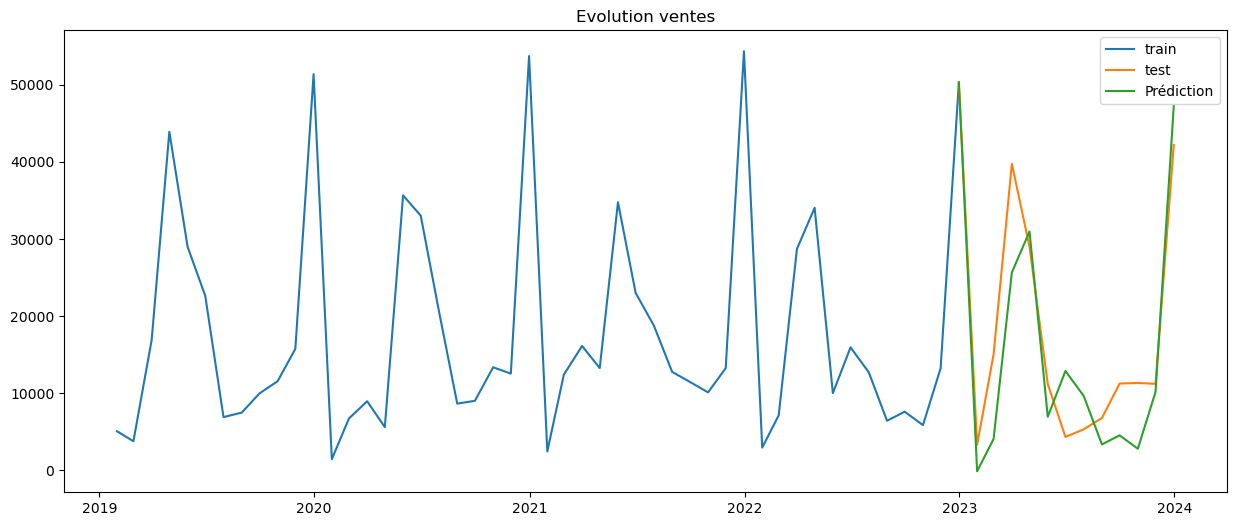

Itération 11


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,1), seasonal_order=(0,1,1,12)
                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -375.782
Date:                            Thu, 29 Feb 2024   AIC                            757.564
Time:                                    14:15:07   BIC                            762.230
Sample:                                01-31-2019   HQIC                           759.175
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7647      0.099     -7.754      0.000      -0.9

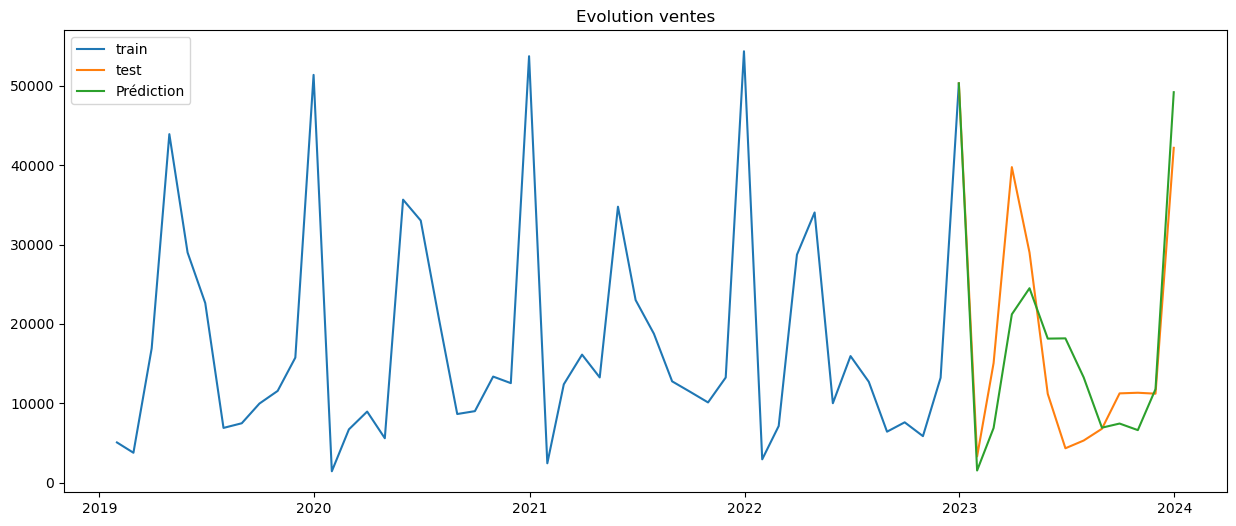

Itération 12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,1), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 13
Modèle : order=(0,1,1), seasonal_order=(1,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                             montant   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -377.874
Date:                             Thu, 29 Feb 2024   AIC                            761.749
Time:                                     14:15:08   BIC                            766.415
Sample:                                 01-31-2019   HQIC                           763.360
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

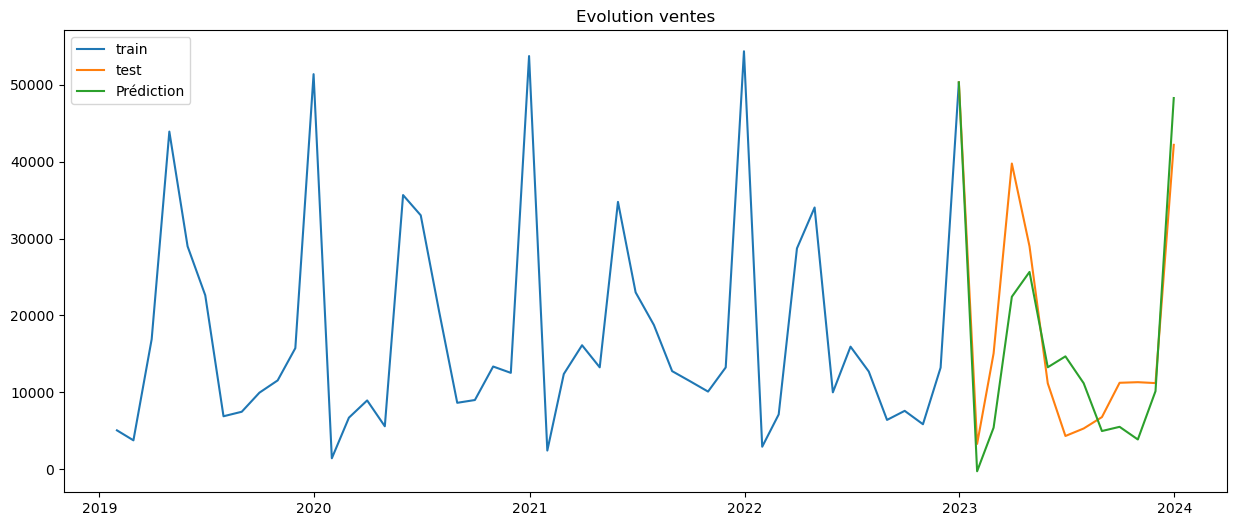

Itération 14
Modèle : order=(0,1,1), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 15


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,1), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 16
Modèle : order=(0,1,1), seasonal_order=(2,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                             montant   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -374.615
Date:                             Thu, 29 Feb 2024   AIC                            757.229
Time:                                     14:15:09   BIC                            763.451
Sample:                                 01-31-2019   HQIC                           759.377
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

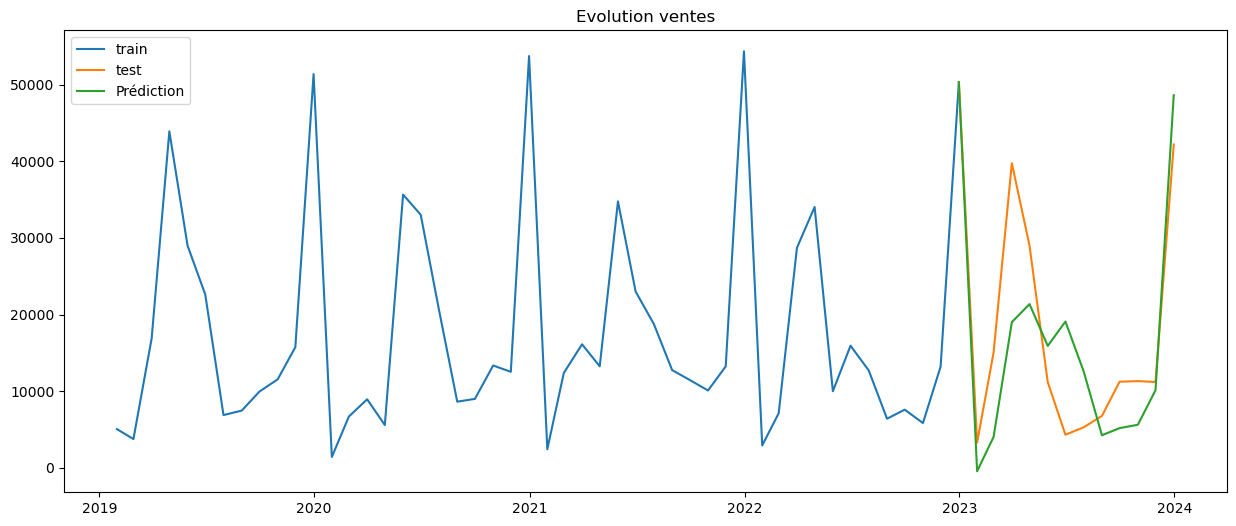

Itération 17


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,1), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 18


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 19
Modèle : order=(0,1,2), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 20


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 22
Modèle : order=(0,1,2), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Modèle : order=(0,1,2), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 27


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(0,1,2), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 28
Modèle : order=(1,1,0), seasonal_order=(0,1,0,12)
                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -381.176
Date:                            Thu, 29 Feb 2024   AIC                            766.353
Time:                                    14:15:14   BIC                            769.463
Sample:                                01-31-2019   HQIC                           767.427
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

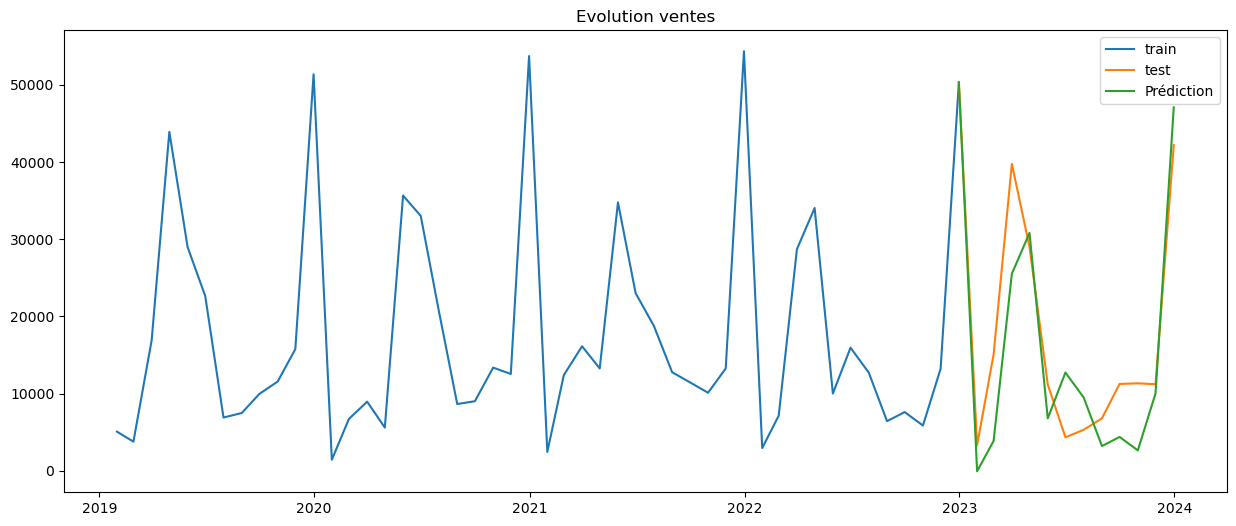

Itération 29
Modèle : order=(1,1,0), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 30


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 31
Modèle : order=(1,1,0), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 32


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,0), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 33
Modèle : order=(1,1,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 34
Modèle : order=(1,1,0), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 36


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 37
Modèle : order=(1,1,1), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 38
Modèle : order=(1,1,1), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 39


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,1), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 40
Modèle : order=(1,1,1), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 41


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,1), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 42


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,1), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 43
Modèle : order=(1,1,1), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 44


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,1), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 45


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 46
Modèle : order=(1,1,2), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 47


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,2), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 48
Modèle : order=(1,1,2), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 49
Modèle : order=(1,1,2), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 50


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,2), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 51


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(1,1,2), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 52
Modèle : order=(1,1,2), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 53


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(1,1,2), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 54


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle : order=(1,1,2), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 55
Modèle : order=(2,1,0), seasonal_order=(0,1,0,12)
                                     SARIMAX Results                                      
Dep. Variable:                            montant   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -379.880
Date:                            Thu, 29 Feb 2024   AIC                            765.760
Time:                                    14:15:28   BIC                            770.426
Sample:                                01-31-2019   HQIC                           767.371
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

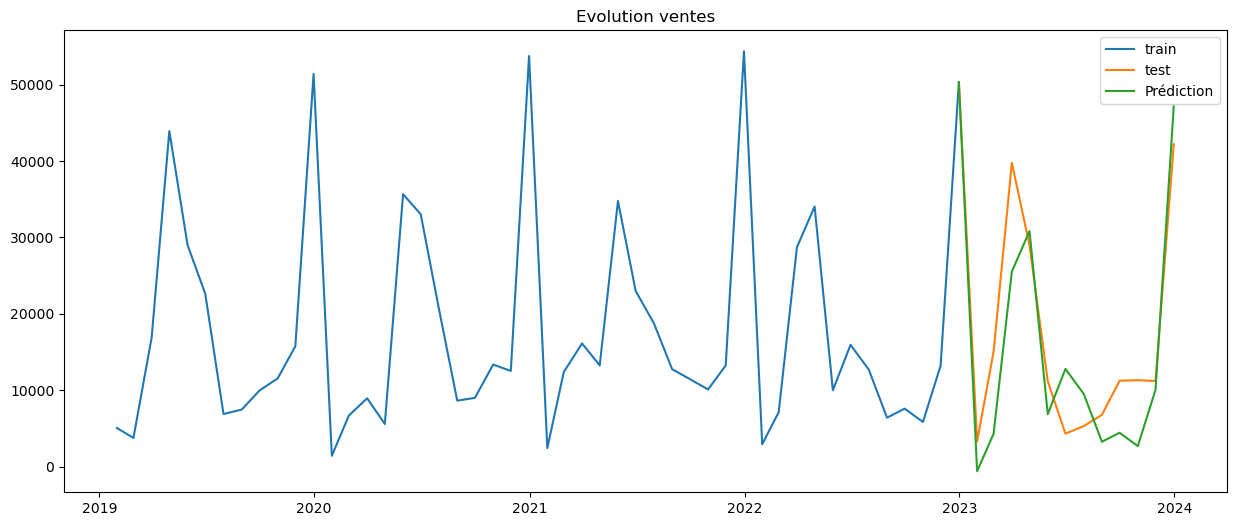

Itération 56
Modèle : order=(2,1,0), seasonal_order=(0,1,1,12)
                                      SARIMAX Results                                       
Dep. Variable:                              montant   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -377.329
Date:                              Thu, 29 Feb 2024   AIC                            762.659
Time:                                      14:15:29   BIC                            768.880
Sample:                                  01-31-2019   HQIC                           764.807
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4164      0.150   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


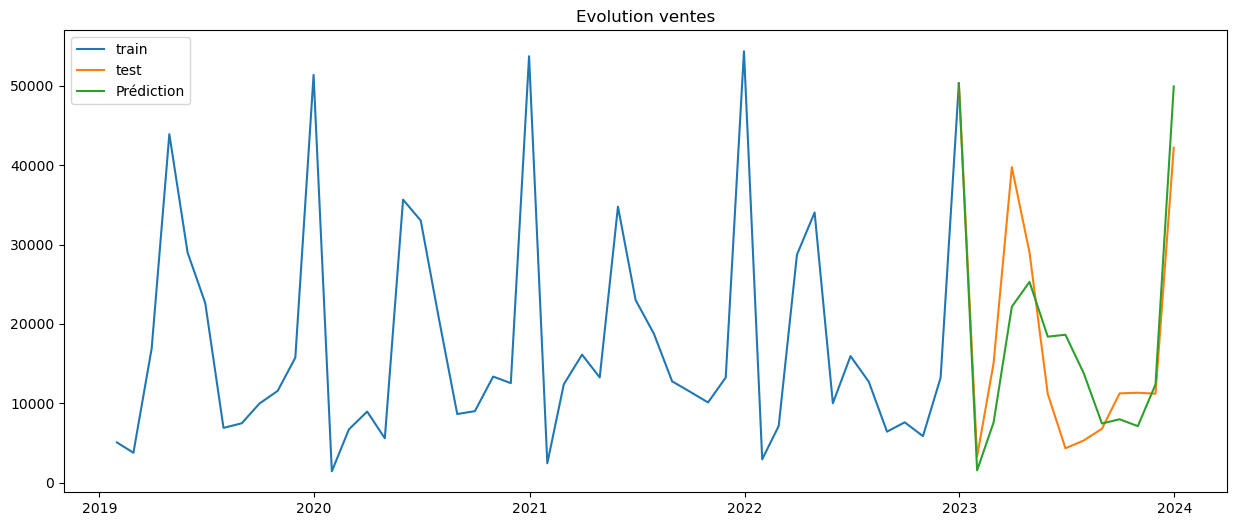

Itération 57


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,0), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 58
Modèle : order=(2,1,0), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 59


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,0), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 60


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,0), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 61
Modèle : order=(2,1,0), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 62


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,0), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 63


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,0), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 64
Modèle : order=(2,1,1), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 65


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,1), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 66
Modèle : order=(2,1,1), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 67
Modèle : order=(2,1,1), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 68


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,1), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 69
Modèle : order=(2,1,1), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 70
Modèle : order=(2,1,1), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 71


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,1), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 72


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,1), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 73


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Modèle : order=(2,1,2), seasonal_order=(0,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 74


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(0,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 75


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(0,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 76


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(1,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 77


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(1,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 78


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Modèle : order=(2,1,2), seasonal_order=(1,1,2,12)
Certains des paramètres ne sont pas significatifs
Itération 79


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(2,1,0,12)
Certains des paramètres ne sont pas significatifs
Itération 80


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modèle : order=(2,1,2), seasonal_order=(2,1,1,12)
Certains des paramètres ne sont pas significatifs
Itération 81
Modèle : order=(2,1,2), seasonal_order=(2,1,2,12)
Certains des paramètres ne sont pas significatifs
{'params': [(0, 1, 0, 2, 1, 0, 12), (0, 1, 1, 0, 1, 0, 12), (0, 1, 1, 0, 1, 1, 12), (0, 1, 1, 1, 1, 0, 12), (0, 1, 1, 2, 1, 0, 12), (1, 1, 0, 0, 1, 0, 12), (2, 1, 0, 0, 1, 0, 12), (2, 1, 0, 0, 1, 1, 12)], 'rmse': [8689.554917773741, 6803.629002493003, 7961.428244363881, 7300.504702579321, 8923.401830904157, 6857.82695678976, 6815.2380350707, 7848.779124488638], 'mape': [0.7200683138184871, 0.5724193125977155, 0.6170156628936098, 0.5873650546353821, 0.7327949779942232, 0.5726193129423967, 0.5819988817324696, 0.6311399701504677], 'mae': [6823.432489084486, 5571.800588401117, 5999.782438684224, 5716.698432211838, 7053.030101628892, 5605.413276028824, 5598.2028335827035, 5967.414102018142], 'aic': [770.5724221475182, 761.3822465846164, 757.5641440812269, 761.7488171290493, 757.229

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
train = y[:-12]
test = y[-13:]

# période saisonnalité
S = 12
# degré de différenciation tendance, saisonnalité
differenciation = (1,1)

# matrice des paramètres à tester
matrice_params = product([0,1,2], repeat=4)

# execution fonction
score2, modeles_valides2 = modele_serie_temporelle(train, test, differenciation, S, matrice_params)

In [49]:
score2

,params,rmse,mape,mae,aic,bic
1,"(0, 1, 1, 0, 1, 0, 12)",6803.629002,0.572419,5571.800588,761.382247,764.492943
5,"(1, 1, 0, 0, 1, 0, 12)",6857.826957,0.572619,5605.413276,766.352759,769.463455
6,"(2, 1, 0, 0, 1, 0, 12)",6815.238035,0.581999,5598.202834,765.760095,770.426139
3,"(0, 1, 1, 1, 1, 0, 12)",7300.504703,0.587365,5716.698432,761.748817,766.414861
2,"(0, 1, 1, 0, 1, 1, 12)",7961.428244,0.617016,5999.782439,757.564144,762.230188
7,"(2, 1, 0, 0, 1, 1, 12)",7848.779124,0.631140,5967.414102,762.658908,768.880300
0,"(0, 1, 0, 2, 1, 0, 12)",8689.554918,0.720068,6823.432489,770.572422,775.238466
4,"(0, 1, 1, 2, 1, 0, 12)",8923.401831,0.732795,7053.030102,757.229234,763.450626


# Nettoyage des villes

In [50]:
from unidecode import unidecode
from Levenshtein import distance
from tqdm import tqdm

In [51]:
pd.set_option('display.max_rows', 600)

In [52]:
df['techadcity'].unique().shape

(320,)

In [53]:
folder2 = 'D:/Data_Analyst_Projet/Projet 3/SQL/'

In [54]:
commune = pd.read_excel(folder2 + 'table_commune.xlsx')
commune.head()

,id_commune,nom_commune,code_postal,id_departement,population
0,01001,L'ABERGEMENT-CLEMENCIAT,1400.0,001,798.0
1,01002,L'ABERGEMENT-DE-VAREY,1640.0,001,257.0
2,01003,AMAREINS,NaN,001,NaN
3,01004,AMBERIEU-EN-BUGEY,1500.0,001,14514.0
4,01005,AMBERIEUX-EN-DOMBES,1330.0,001,1776.0


In [55]:
def comparaison_liste(ville1, ville2):
    ville_not = []

    for city in ville1.unique():
        if city not in ville2.unique():
            ville_not.append(city)
            
    print(f"Voici les villes mal orthographiées qui ont été remplacées : {ville_not}")
    print(f"Il reste {ville2.unique().shape[0]} villes uniques.")

In [56]:
# enlève '29170 - '
print(str.upper("Transformation 1 : enlève 29170 - et  2"))
ville = df['techadcity'].str.replace('29170 - ', '') \
                        .str.replace(' 2', '') \
                        .fillna('INCONNU')
comparaison_liste(df['techadcity'], ville)
print('_'*50)

# met en majuscule
print(str.upper("Transformation 2 : met en majuscule"))
ville1 = ville.str.upper()
comparaison_liste(ville, ville1)
print('_'*50)

# enlève les CEDEX
print(str.upper("Transformation 3 : enlève les CEDEX du nom des villes"))
ville2 = ville1.str.replace('CEDEX', '')
comparaison_liste(ville1, ville2)
print('_'*50)

# enlève les espaces au début et à la fin
print(str.upper("Transformation 4 : enlève les espaces au début et à la fin"))
ville3 = ville2.str.strip()
comparaison_liste(ville2, ville3)
print('_'*50)

# enlève les accents et les caractères spéciaux
print(str.upper("Transformation 5 : enlève les accents"))
ville4 = ville3.apply(unidecode)
comparaison_liste(ville3, ville4)
print('_'*50)

# remplace les tirets par des espaces
print(str.upper("Transformation 6 : remplace les tirets par des espaces"))
ville5 = ville4.str.replace('-', ' ')
comparaison_liste(ville4, ville5)
print('_'*50)

# enleve les caractères spéciaux
print(str.upper("Transformation 7 : enlève les caractères spéciaux"))
ville6 = ville5.str.replace(r'[^\w\s]', '', regex=True)
comparaison_liste(ville5, ville6)
print('_'*50)

# remplace ST par SAINT
print(str.upper("Transformation 8 : remplace ST par SAINT"))
ville7 = ville6.str.replace('^ST\s', 'SAINT ', regex=True) \
               .str.replace('\sST\s', ' SAINT ', regex=True)
comparaison_liste(ville6, ville7)
print('_'*50)

# ajoute le déterminant manquant pour les villes qui en ont un normalement (FORET FOUESNANT --> LA FORET FOUESNANT)
print(str.upper("Transformation 9 : ajoute le déterminant manquant pour les villes qui en ont un normalement"))
# cherche les villes qui ont un déterminant et l'enlève 
ville_sans_determinant = ville6[ville6.str.contains('^(LE|LA)\s', regex=True)].str.replace('^LA\s', '', regex=True) \
                                                                              .str.replace('^LE\s', '', regex=True).unique()
ville_avec_determinant = ville6[ville6.str.contains('^(LE|LA)\s', regex=True)].unique()
# on remplace les villes sans déterminant par celles qui en ont un 
ville8 = ville7
for ville_s, ville_d in zip(ville_sans_determinant, ville_avec_determinant):
    ville8 = ville8.replace(ville_s, ville_d)
comparaison_liste(ville7, ville8)
print('_'*50)

# remplace HOPITAL CAMFROUT et OUESSANT'
print(str.upper("Transformation 10 : remplace HOPITAL CAMFROUT et OUESSANT"))
ville9 = ville8.str.replace('^OUESSANT$', 'ILE D OUESSANT', regex=True) \
               .str.replace('^HOPITAL CAMFROUT$', 'L HOPITAL CAMFROUT', regex=True)
comparaison_liste(ville8, ville9)
print('_'*50)

TRANSFORMATION 1 : ENLÈVE 29170 - ET  2
Voici les villes mal orthographiées qui ont été remplacées : ['BREST CEDEX 2', nan, '29170 - FOUESNANT']
Il reste 319 villes uniques.
__________________________________________________
TRANSFORMATION 2 : MET EN MAJUSCULE
Voici les villes mal orthographiées qui ont été remplacées : ['RINCóN DE LA VICTORIA', 'Landerneau', 'Lannilis', 'Clohars carnoet', 'Tréméven', 'Quimper', 'Lanneuffret', 'Brest', 'Carhaix-Plouguer', 'Santec', 'plougoulm', 'Guipavas', 'Saint-Renan', 'Plougasnou', 'Fouesnant', 'Le Faou', 'Quimperlé', 'Saint-Divy', 'plouégat-moysan', 'Saint-Nic', 'Plouégat-Moysan.']
Il reste 308 villes uniques.
__________________________________________________
TRANSFORMATION 3 : ENLÈVE LES CEDEX DU NOM DES VILLES
Voici les villes mal orthographiées qui ont été remplacées : ['CARHAIX PLOUGUER CEDEX', 'QUIMPER CEDEX', 'QUIMPERLE CEDEX', 'LANDIVISIAU CEDEX', 'BREST CEDEX']
Il reste 308 villes uniques.
__________________________________________________

C:\Users\Raphaël\AppData\Local\Temp\ipykernel_128732\3802143520.py:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ville_sans_determinant = ville6[ville6.str.contains('^(LE|LA)\s', regex=True)].str.replace('^LA\s', '', regex=True) \
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_128732\3802143520.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ville_avec_determinant = ville6[ville6.str.contains('^(LE|LA)\s', regex=True)].unique()


Voici les villes mal orthographiées qui ont été remplacées : ['FORET FOUESNANT', 'TREVOUX', 'FOREST LANDERNEAU', 'ROCHE MAURICE', 'FOLGOET', 'FAOU', 'CONQUET', 'RELECQ KERHUON', 'DRENNEC', 'MARTYRE', 'FEUILLEE', 'JUCH']
Il reste 263 villes uniques.
__________________________________________________
TRANSFORMATION 10 : REMPLACE HOPITAL CAMFROUT ET OUESSANT
Voici les villes mal orthographiées qui ont été remplacées : ['HOPITAL CAMFROUT', 'OUESSANT']
Il reste 261 villes uniques.
__________________________________________________


In [190]:
dictionnaire_comparaison = {'referentiel' : [],
                           'ville_comparee' : [],
                           'distance' : []}

for referentiel in tqdm(ville9.unique()):
    for ville_comparee in ville9.unique():
        try : 
            distance_calcule = distance(referentiel, ville_comparee)

            dictionnaire_comparaison['referentiel'].append(referentiel)
            dictionnaire_comparaison['ville_comparee'].append(ville_comparee)
            dictionnaire_comparaison['distance'].append(distance_calcule)
            
        except Exception as error:
            print(f"{referentiel}, {ville_comparee}, {error}")
        
df_distance = pd.DataFrame(dictionnaire_comparaison).sort_values('distance')
df_distance = df_distance[df_distance['distance']>0]

100%|███████████████████████████████████████████████████████████████████████████████| 261/261 [00:01<00:00, 257.54it/s]


In [191]:
df_distance.head(200)

,referentiel,ville_comparee,distance
48015,GOULIEN,GOULVEN,1
65955,GOULVEN,GOULIEN,1
65320,PLOEVEN,PLEUVEN,2
65386,PLOEVEN,PLOUVIEN,2
65426,PLOEVEN,PLOZEVET,2
43965,QUERRIEN,BERRIEN,2
30705,BERRIEN,QUERRIEN,2
1973,PLOUIDER,PLOUEDERN,2
9271,PLOUVORN,PLOUVIEN,2
32754,PLOUGONVEN,PLOUGONVELIN,2


# Remplacement des villes dans df

In [59]:
df

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,0015I00000CPc73,DIVERS DONS,006Sa000003C0Ij,15.0,7.5,50.0,IRVILLAC,29460,FRA,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2025-01-05,0015I00000PmfMs,Street Marketing Iti 01-03-2021,006Sa000003C0H2,10.0,5.0,50.0,QUIMPERLE,29300,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,Street Marketing Iti 01-03-2021,Don
2025-01-05,0015I00000OXXSM,L2C 21 DEFORESTATION AMAZONIE MesOp,006Sa000003C0G1,15.0,7.5,50.0,MELGVEN,29140,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,L2C 21 DEFORESTATION AMAZONIE MesOp,Don


In [60]:
df['ville_modifiee'] = ville9

In [61]:
df.groupby('ville_modifiee')['montant'].agg(['count', 'sum']).sort_values('count')

,count,sum
ville_modifiee,,
ARGOL,1,20.00
SAINTE SEVE,1,40.00
RINCON DE LA VICTORIA,1,30.00
PONT DE BUIS,1,100.00
PLOUGOURVEST,1,20.00
PLOUEGAT GUERAND,1,50.00
LANNEUFFRET,1,50.00
LANGOLEN,1,80.00
LAMPAUL PLOUDALMEZEAU,1,60.00


In [62]:
df

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource,ville_modifiee
date_reference,,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don,QUIMPER
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,FOUESNANT
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don,CLEDER
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,BREST
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,MORLAIX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,0015I00000CPc73,DIVERS DONS,006Sa000003C0Ij,15.0,7.5,50.0,IRVILLAC,29460,FRA,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,IRVILLAC
2025-01-05,0015I00000PmfMs,Street Marketing Iti 01-03-2021,006Sa000003C0H2,10.0,5.0,50.0,QUIMPERLE,29300,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,Street Marketing Iti 01-03-2021,Don,QUIMPERLE
2025-01-05,0015I00000OXXSM,L2C 21 DEFORESTATION AMAZONIE MesOp,006Sa000003C0G1,15.0,7.5,50.0,MELGVEN,29140,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,L2C 21 DEFORESTATION AMAZONIE MesOp,Don,MELGVEN


In [63]:
df[['id_ressource', 'ville_modifiee']].to_csv(folder + 'ville_modifiee.csv', index=False)

In [64]:
df

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource,ville_modifiee
date_reference,,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don,QUIMPER
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,FOUESNANT
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don,CLEDER
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,BREST
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,MORLAIX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,0015I00000CPc73,DIVERS DONS,006Sa000003C0Ij,15.0,7.5,50.0,IRVILLAC,29460,FRA,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don,IRVILLAC
2025-01-05,0015I00000PmfMs,Street Marketing Iti 01-03-2021,006Sa000003C0H2,10.0,5.0,50.0,QUIMPERLE,29300,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,Street Marketing Iti 01-03-2021,Don,QUIMPERLE
2025-01-05,0015I00000OXXSM,L2C 21 DEFORESTATION AMAZONIE MesOp,006Sa000003C0G1,15.0,7.5,50.0,MELGVEN,29140,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,L2C 21 DEFORESTATION AMAZONIE MesOp,Don,MELGVEN


# Modèle avec Prophet

In [65]:
df2 = pd.read_csv(folder+'titi.csv', sep=';', index_col='date_reference', parse_dates=True, dayfirst=True).sort_index()
df2.head()

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don


In [84]:
df2

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2019-01-03,0015I00000CPaIF,SPONTANE,0065I000007kTwG,30.0,30.0,100.0,QUIMPER,29000,France,18/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Don unique,SPONTANE,Don
2019-01-05,0015I000005qH7c,DIVERS DONS,0065I000007srgj,12.0,12.0,100.0,FOUESNANT,29170,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qDbs,FIDELISATION NOEL 2017,0065I000007ssmW,5.0,5.0,100.0,CLEDER,29233,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,FIDELISATION NOEL 2017,Don
2019-01-05,0015I00000CPaRT,DIVERS DONS,0065I000007sqTV,7.0,7.0,100.0,BREST,29200,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2019-01-05,0015I000005qGdn,DIVERS DONS,0065I000007sqo1,10.0,10.0,100.0,MORLAIX,29600,France,05/01/2019,Payé,Q1-2019,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05,0015I00000CPc73,DIVERS DONS,006Sa000003C0Ij,15.0,7.5,50.0,IRVILLAC,29460,FRA,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,DIVERS DONS,Don
2025-01-05,0015I00000PmfMs,Street Marketing Iti 01-03-2021,006Sa000003C0H2,10.0,5.0,50.0,QUIMPERLE,29300,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,Street Marketing Iti 01-03-2021,Don
2025-01-05,0015I00000OXXSM,L2C 21 DEFORESTATION AMAZONIE MesOp,006Sa000003C0G1,15.0,7.5,50.0,MELGVEN,29140,France,02/02/2024,Promesse,Q1-2025,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,PA SEPA,L2C 21 DEFORESTATION AMAZONIE MesOp,Don


In [85]:
df2['sous_type'].value_counts()

PA SEPA              38244
Don unique            9257
Epargne solidaire      434
PA CB                  266
Don boutique           226
Abandon de frais        15
Name: sous_type, dtype: int64

In [154]:
data2 = df2[(df2['etape']=='Payé')&(df2['montant']<10000)][:'2023']
data2.tail()

,id_compte,campagne,id_ressource,montant,chiffre_affaires_prevu,probabilite,techadcity,techadpostalcode,techadcountry,date_creation,etape,type_exercice,type,delegation_diocesaine,centre_responsable_collecte,campagne_axe_4_code,entite_comptable,sous_type,source_principale_de_campagne,type_enregistrement_ressource
date_reference,,,,,,,,,,,,,,,,,,,,
2023-12-31,0015I000003Ngzm,Livret Agir,006Sa000003V4qa,64.83,64.83,100.0,DOUARNENEZ,29100,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don
2023-12-31,0015I00000Nv15d,FCP Faim et Développement Compartiment Solidarité,006Sa000003hObd,476.35,476.35,100.0,PLOUNEOUR BRIGNOGAN PLAGES,29890,France,14/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,FCP Faim et Développement Compartiment Solidarité,Don
2023-12-31,0015I00000CPeoZ,Livret Agir,006Sa000003V4qe,89.38,89.38,100.0,LE FAOU,29590,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don
2023-12-31,0015I00000M0Yq3,Livret Agir,006Sa000003V5r4,37.11,37.11,100.0,PLOUENAN,29420,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don
2023-12-31,0015I000005qCG3,Livret Agir,006Sa000003V5rB,42.89,42.89,100.0,PLOUNEOUR BRIGNOGAN PLAGES,29890,France,09/02/2024,Payé,Q4-2023,NaN,NaN,CCFD Terre Solidaire,NaN,CCFD Terre Solidaire,Epargne solidaire,Livret Agir,Don


In [155]:
data2.shape

(38073, 20)

<Axes: xlabel='date_reference'>

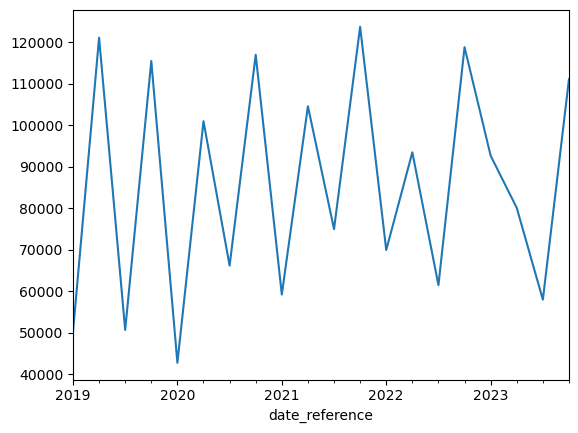

In [156]:
data2['montant'].resample('Q').sum().plot()

In [157]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [158]:
y1 = data2['montant'].resample('M').sum()

In [164]:
y = y1.reset_index().rename(columns={'date_reference':'ds', 'montant' : 'y'})
y['floor'] = 0
y['cap'] = 130000

In [165]:
train = y[:-12]
test = y[-12:]

In [181]:
m = Prophet(growth = 'logistic', changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(y)

15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
future = m.make_future_dataframe(periods=12, freq='M')
future['floor'] = 0
future['cap'] = 130000

In [183]:
forecast = m.predict(future)
forecast.tail(8)

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
64,2024-05-31,29469.617905,130000,0,42173.219755,55402.055306,29469.617889,29469.617923,19145.948301,19145.948301,19145.948301,19145.948301,19145.948301,19145.948301,0.0,0.0,0.0,48615.566206
65,2024-06-30,29551.114907,130000,0,33607.437715,47356.483514,29551.114883,29551.114931,10688.396840,10688.396840,10688.396840,10688.396840,10688.396840,10688.396840,0.0,0.0,0.0,40239.511747
66,2024-07-31,29635.495454,130000,0,23646.977573,37414.342822,29635.495419,29635.495486,983.870159,983.870159,983.870159,983.870159,983.870159,983.870159,0.0,0.0,0.0,30619.365612
67,2024-08-31,29720.045654,130000,0,12261.951875,25944.258727,29720.045608,29720.045694,-10687.126132,-10687.126132,-10687.126132,-10687.126132,-10687.126132,-10687.126132,0.0,0.0,0.0,19032.919522
68,2024-09-30,29802.029899,130000,0,9975.990687,23557.532977,29802.029842,29802.029951,-13408.248100,-13408.248100,-13408.248100,-13408.248100,-13408.248100,-13408.248100,0.0,0.0,0.0,16393.781799
69,2024-10-31,29886.913738,130000,0,16192.939332,29222.723613,29886.913670,29886.913803,-7307.030233,-7307.030233,-7307.030233,-7307.030233,-7307.030233,-7307.030233,0.0,0.0,0.0,22579.883505
70,2024-11-30,29969.220730,130000,0,21380.386368,35250.995245,29969.220647,29969.220806,-1531.087887,-1531.087887,-1531.087887,-1531.087887,-1531.087887,-1531.087887,0.0,0.0,0.0,28438.132843
71,2024-12-31,30054.437934,130000,0,69325.249114,82812.248978,30054.437839,30054.438024,45749.506883,45749.506883,45749.506883,45749.506883,45749.506883,45749.506883,0.0,0.0,0.0,75803.944817


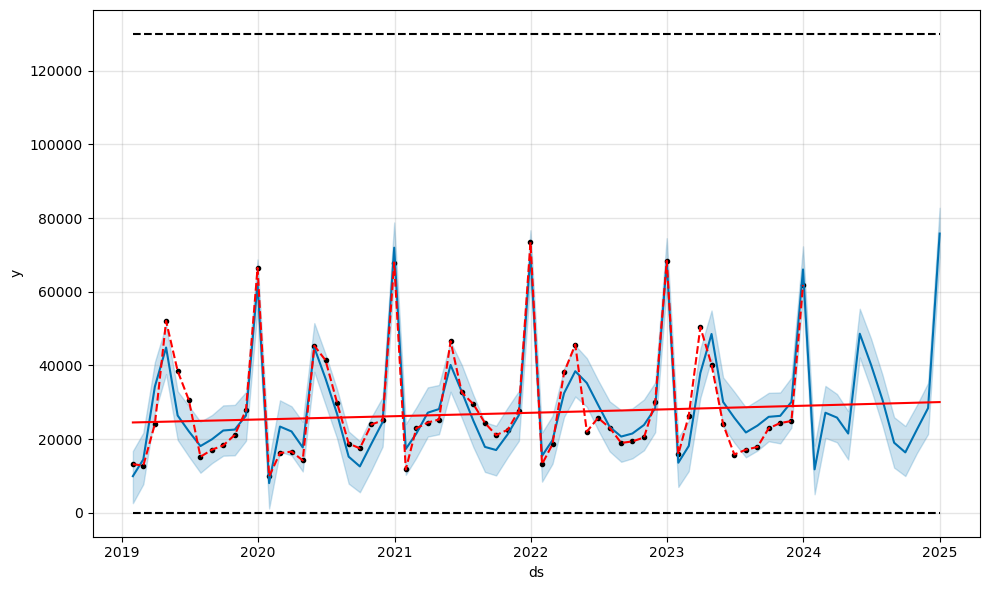

In [184]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.plot(y1, c='r', linestyle='--')

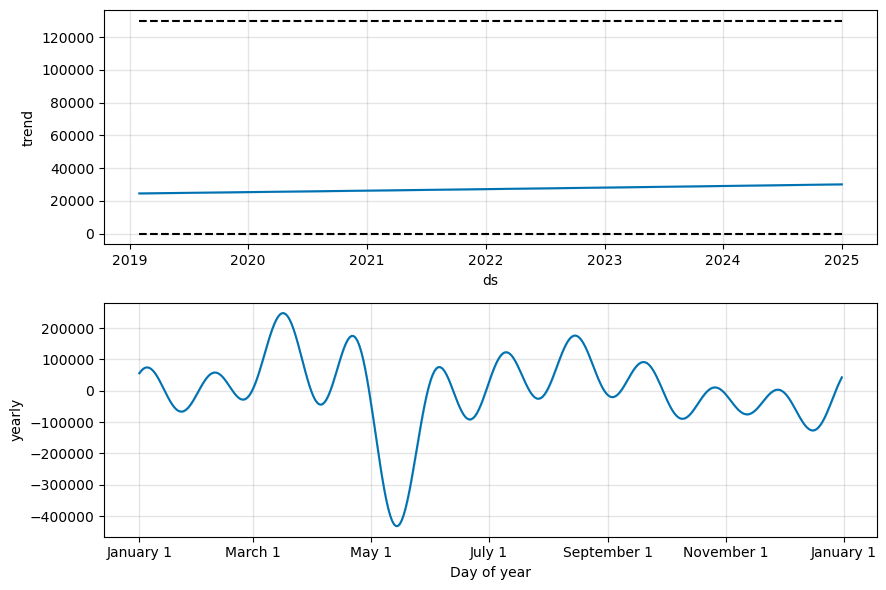

In [185]:
fig = m.plot_components(forecast)

In [186]:
prevision = forecast.set_index('ds')['yhat'][:'2023']
prevision.shape

(60,)

In [187]:
y1.shape

(60,)

In [188]:
rmse = np.sqrt(mean_squared_error(y1, prevision))
mape = mean_absolute_percentage_error(y1, prevision)
mae = mean_absolute_error(y1, prevision)

print(f"Erreur quadratique moyenne RMSE : {rmse}")
print(f"Pourcentage d'erreur moyen MAPE : {mape}")
print(f"Erreur absolue moyenne MAE : {mae}")

Erreur quadratique moyenne RMSE : 5293.585766919055
Pourcentage d'erreur moyen MAPE : 0.17899227738984108
Erreur absolue moyenne MAE : 4317.2734626303345


In [189]:
result = pd.concat((y1, prevision), axis=1)
result

,montant,yhat
2019-01-31,13192.39,9942.558409
2019-02-28,12815.45,14483.513293
2019-03-31,24102.72,34282.132462
2019-04-30,52068.59,44868.998051
2019-05-31,38474.41,26403.069878
2019-06-30,30582.03,22102.730251
2019-07-31,15211.99,18106.894904
2019-08-31,17134.16,19962.406319
2019-09-30,18283.63,22333.635938
2019-10-31,21145.19,22596.495381


In [175]:
erreur_absolue_moyenne = (np.sum(np.abs(result['montant'] - result['yhat'])))/len(result)
erreur_absolue_moyenne

4387.141832604974